In [1]:
from helper_functions import *

In [2]:
SHOOTINGS_FILE = 'data/prepared/shootings/shooting_frames_.csv'

## Agenda Setting (Table 6)

In [3]:
shootings = pd.read_csv(SHOOTINGS_FILE)

In [4]:
lib = shootings[shootings['leaning']==0].copy()
cons = shootings[shootings['leaning']==2].copy()
print("\\textbf{Victim Variable} & \\textbf{Lib.} & \\textbf{Cons.} & \\textbf{Cohen's \\textsl{d}}\\")
for val in ['mental_illness', 'fleeing', 'video', 'armed', 'attack']:
    L = (lib[val].values==True)
    R = (cons[val].values==True)

    test(L,R, title=val)

\textbf{Victim Variable} & \textbf{Lib.} & \textbf{Cons.} & \textbf{Cohen's \textsl{d}}\
Mental illness  & 0.206 & 0.194 & -0.030 \\
Fleeing  & 0.246 & 0.235 & -0.027 \\
Video  & 0.136 & 0.155 & 0.054 \\
Armed ** & 0.580 & 0.648 & 0.140 \\
Attack *** & 0.351 & 0.486 & 0.276 \\


## Framing Differences (Table 2, Left)

In [5]:
lib = shootings[shootings['leaning']==0].copy()
cons = shootings[shootings['leaning']==2].copy()

lib['age'] = [to_int(val) for val in lib.age.values]
cons['age'] = [to_int(val) for val in cons.age.values]

print('--unconditioned--')
for frame in sorted(['age', 'armed', 'attack', 'criminal_record', 'fleeing', 'gender', 
     'interview', 'legal_language', 'mental_illness', 'official_report',
     'race', 'systemic', 'unarmed', 'video']):
    
    L = (lib['found.'+frame].values < np.inf)
    R = (cons['found.'+frame].values < np.inf)
    
    test(L,R, title=frame)

--unconditioned--
Age *** & 0.472 & 0.764 & 0.628 \\
Armed *** & 0.439 & 0.588 & 0.302 \\
Attack *** & 0.369 & 0.539 & 0.347 \\
Criminal record * & 0.613 & 0.655 & 0.087 \\
Fleeing *** & 0.228 & 0.336 & 0.244 \\
Gender *** & 0.543 & 0.696 & 0.317 \\
Interview *** & 0.708 & 0.780 & 0.166 \\
Legal language *** & 0.875 & 0.919 & 0.144 \\
Mental illness * & 0.181 & 0.145 & -0.097 \\
Official report *** & 0.586 & 0.808 & 0.496 \\
Race *** & 0.428 & 0.214 & -0.471 \\
Systemic *** & 0.428 & 0.291 & -0.286 \\
Unarmed *** & 0.195 & 0.110 & -0.239 \\
Video  & 0.164 & 0.191 & 0.069 \\


#### Do we observe the same differences using BoW methods?

In [16]:
import re
from glob import glob

regexes = {
    'ATTACK': r"attack|confront|fire|harm|injure|lunge|shoot|stab|strike",
    'RACE': '|'.join(set.union(*[set([x.strip().lower() for x in open(fn, 'r').readlines()])
                      for fn in glob('resources/racial_and_gender_lexicons_basic/*.txt')
                      if 'male' not in fn and 'male' not in fn
                    ])),
    'BLACK': r"black"
}

bows = {}
for i, row in tqdm(shootings.iterrows(), total=len(shootings)):
    bows[i] = {}
    for key, val in regexes.items():
        count = len(re.findall(val, row['text']))
        doc_length = row['num_words']
        if doc_length:
            bows[i][key] = int(count>0)#(count / doc_length)
        else:
            bows[i][key] = 0 #None
bows_df = pd.DataFrame().from_dict(bows,orient='index')

100%|██████████| 80806/80806 [01:16<00:00, 1058.14it/s]


In [17]:
bows_df.fillna(0,inplace=True)
shootings[list(regexes)] = bows_df[list(regexes)]

In [19]:
lib = shootings[shootings['leaning']==0].copy()
cons = shootings[shootings['leaning']==2].copy()
for frame in regexes:
    L = (lib[frame].values)
    R = (cons[frame].values)
    
    test(L,R, title=frame, scientific=False, full_p=False)

Attack *** & 0.868 & 0.931 & 0.210 \\
Race *** & 0.465 & 0.318 & -0.304 \\
Black *** & 0.360 & 0.211 & -0.333 \\


## order given presence of frame (Table 2, Right)

In [7]:
lib = shootings[shootings['leaning']==0]
cons = shootings[shootings['leaning']==2]
print('--conditioned on the binary presence of the frame--')
print("Framing Device & Lib. Ratio & Cons. Ratio & Lib. num samples & Cons. num samples & Cohen's D")
for frame in sorted(['age', 'armed', 'attack', 'criminal_record', 'fleeing', 'gender', 
     'interview', 'legal_language', 'mental_illness', 'official_report',
     'race', 'systemic', 'unarmed', 'video']):
    
    lib_conditioned = lib.copy()
    cons_conditioned = cons.copy()

    lib_conditioned = lib[lib['found.'+frame]<np.inf]
    cons_conditioned = cons[cons['found.'+frame]<np.inf]
    
    L = (1.0/lib_conditioned['found.'+frame].values)
    R = (1.0/cons_conditioned['found.'+frame].values)
    
    test(L,R, title=frame, include_n=True)

--conditioned on the binary presence of the frame--
Framing Device & Lib. Ratio & Cons. Ratio & Lib. num samples & Cons. num samples & Cohen's D
Age  & 0.480 & 0.467 & 515 & 766 & -0.044 \\
Armed * & 0.313 & 0.358 & 478 & 589 & 0.176 \\
Attack  & 0.267 & 0.306 & 402 & 540 & 0.169 \\
Criminal record ** & 0.294 & 0.278 & 668 & 656 & -0.074 \\
Fleeing  & 0.246 & 0.217 & 248 & 337 & -0.177 \\
Gender  & 0.611 & 0.622 & 592 & 697 & 0.033 \\
Interview *** & 0.184 & 0.163 & 772 & 782 & -0.173 \\
Legal language *** & 0.523 & 0.419 & 954 & 921 & -0.322 \\
Mental illness  & 0.301 & 0.296 & 197 & 145 & -0.020 \\
Official report *** & 0.194 & 0.163 & 639 & 810 & -0.252 \\
Race *** & 0.296 & 0.233 & 467 & 214 & -0.255 \\
Systemic *** & 0.410 & 0.283 & 466 & 292 & -0.397 \\
Unarmed  & 0.408 & 0.470 & 213 & 110 & 0.179 \\
Video *** & 0.283 & 0.436 & 179 & 191 & 0.463 \\


### Table 7

In [8]:
lib = shootings[shootings['leaning']==0].copy()
cons = shootings[shootings['leaning']==2].copy()

lib['age'] = [to_int(val) for val in lib.age.values]
cons['age'] = [to_int(val) for val in cons.age.values]

print('--conditioned--')
for frame in sorted(['mental_illness', 'fleeing',
       'video', 'armed', 'attack', 'unarmed', 'race-1', 'race-2', 
                     'gender-1', 'gender-2', 'age-1', 'age-2']):
    
    lib_conditioned = lib.copy()
    cons_conditioned = cons.copy()
    
    title = frame + ' (true)'
    if frame=='unarmed':
        lib_conditioned = lib[lib['armed']==False].copy()
        cons_conditioned = cons[cons['armed']==False].copy()
    if frame=='gender-1':
        lib_conditioned = lib[lib['gender']=='Female'].copy()
        cons_conditioned = cons[cons['gender']=='Female'].copy()
        frame = 'gender'
        title = 'Gender (female victim)'
    if frame=='gender-2':
        lib_conditioned = lib[lib['gender']=='Male'].copy()
        cons_conditioned = cons[cons['gender']=='Male'].copy()
        frame = 'gender'
        title = 'Gender (male victim)'
    if frame=='age-1':
        lib_conditioned = lib[lib['age']<=21].copy()
        cons_conditioned = cons[cons['age']<=21].copy()
        frame = 'age'
        title = 'Age (<=21)'
    if frame=='age-2':
        lib_conditioned = lib[lib['age']>21].copy()
        cons_conditioned = cons[cons['age']>21].copy()
        frame = 'age'
        title = 'Age (>21)'
    if frame in {'mental_illness', 'fleeing',
       'video', 'armed', 'attack'}:
        lib_conditioned = lib[lib[frame]==True].copy()
        cons_conditioned = cons[cons[frame]==True].copy()
        
        
    if frame=='race-1':
        lib_conditioned = lib[lib['race']=='Black'].copy()
        cons_conditioned = cons[cons['race']=='Black'].copy()
        frame = 'race'
        title = 'Race (Black victim)' 
    elif frame=='race-2':
        lib_conditioned = lib[lib['race']=='White'].copy()
        cons_conditioned = cons[cons['race']=='White'].copy()
        frame = 'race'
        title = 'Race (white victim)' 
    else:
        L = lib_conditioned[lib_conditioned['race']=='Black']['found.'+frame].values < np.inf
        R = cons_conditioned[cons_conditioned['race']=='Black']['found.'+frame].values < np.inf
        test(L,R, title=title + '(black victim)')
        
        L = lib_conditioned[lib_conditioned['race']=='White']['found.'+frame].values < np.inf
        R = cons_conditioned[cons_conditioned['race']=='White']['found.'+frame].values < np.inf
        test(L,R, title=title + '(white victim)')
        
    L = (lib_conditioned['found.'+frame].values < np.inf)
    R = (cons_conditioned['found.'+frame].values < np.inf)
    
    test(L,R, title=title)

--conditioned--
Age (<=21)(black victim) *** & 0.661 & 0.897 & 0.561 \\
Age (<=21)(white victim) * & 0.642 & 0.857 & 0.506 \\
Age (<=21) *** & 0.684 & 0.872 & 0.454 \\
Age (>21)(black victim) *** & 0.480 & 0.734 & 0.532 \\
Age (>21)(white victim) *** & 0.368 & 0.778 & 0.921 \\
Age (>21) *** & 0.422 & 0.743 & 0.687 \\
Armed (true)(black victim) ** & 0.639 & 0.762 & 0.270 \\
Armed (true)(white victim) ** & 0.552 & 0.693 & 0.293 \\
Armed (true) *** & 0.590 & 0.701 & 0.233 \\
Attack (true)(black victim) *** & 0.407 & 0.585 & 0.359 \\
Attack (true)(white victim) *** & 0.378 & 0.573 & 0.396 \\
Attack (true) *** & 0.381 & 0.575 & 0.395 \\
Fleeing (true)(black victim) * & 0.424 & 0.589 & 0.334 \\
Fleeing (true)(white victim) *** & 0.250 & 0.542 & 0.618 \\
Fleeing (true) *** & 0.381 & 0.604 & 0.458 \\
Gender (female victim)(black victim)  & 0.625 & 0.765 & 0.293 \\
Gender (female victim)(white victim) ** & 0.571 & 0.824 & 0.572 \\
Gender (female victim) *** & 0.581 & 0.805 & 0.489 \\
Gender (ma

## plotting

#### dataset statistics (Table 1 PVFC Statistics)

In [15]:
shootings = pd.read_csv('data/prepared/shootings/shooting_frames_1.2.csv')

/nethome/cziems3/miniconda3/envs/coref/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (11,26,28,29,30) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [16]:
import tldextract
from helper_functions import leaning_label

bias = []
urls = []
media_bias = pd.read_csv('resources/mbfc/media-bias-scrubbed-results.csv')
for i, row in media_bias.iterrows():
    subdomain, domain, suffix = tldextract.extract(row['url'])
    urls.append(domain)
media_bias['domain'] = urls

from tqdm import tqdm
leanings = []
leanings_labels = []
for i, row in tqdm(shootings.iterrows(), total=len(shootings)):
    bias = media_bias[media_bias['domain']==row['domain']]
    if len(bias)>0:
        leanings_labels.append(leaning_label(int(bias.iloc[0]['bias_rating'].item())))
        leanings.append(int(bias.iloc[0]['bias_rating'].item()))
    else:
        leanings_labels.append('None')
        leanings.append('None')
        
shootings['leaning'] = leanings
shootings['leaning_label'] = leanings_labels

100%|██████████| 82099/82099 [00:39<00:00, 2075.32it/s]


In [17]:
header = """
\\toprule
\\textbf{Leaning} & \\textbf{Articles} (\#) & \\textbf{Events} (\#) & \\textbf{Sources} (\#) & \\textbf{Armed} (\%) & \\textbf{Attack} (\%) & \\textbf{Fleeing} (\%) & \\textbf{Mental Illness} (\%) & \\textbf{Video} (\%) \\\\ \midrule
"""
print(header)
for lean in ['Left', 'Left Center', 'Least Biased', 'Right Center', 'Right', 'None']:
    consider = shootings[shootings['leaning_label']==lean].copy()
    print( "{:} & {:,d} & {:,.1f} & {:,d} & {:,.1f} & {:,.1f} & {:,.1f} & {:,.1f} & {:,.1f} \\\\".format(
        *tuple([lean, len(consider), len(set(consider['id'])), len(set(consider.domain))] + 
            [100*len(consider[consider[category]==True])/len(consider) for category in ['armed', 
                                                                                        'attack', 
                                                                                        'fleeing', 
                                                                                        'mental_illness', 
                                                                                        'video']]))
         )
lean='Total'
consider = shootings.copy()
print( "{:} & {:,d} & {:,d} & {:,d} & {:,.1f} & {:,.1f} & {:,.1f} & {:,.1f} & {:,.1f} \\\\ \\bottomrule".format(
    *tuple([lean, len(consider), len(set(consider['id'])), len(set(consider.domain))] + 
        [100*len(consider[consider[category]==True])/len(consider) for category in ['armed', 
                                                                                    'attack', 
                                                                                    'fleeing', 
                                                                                    'mental_illness', 
                                                                                    'video']]))
     )


\toprule
\textbf{Leaning} & \textbf{Articles} (\#) & \textbf{Events} (\#) & \textbf{Sources} (\#) & \textbf{Armed} (\%) & \textbf{Attack} (\%) & \textbf{Fleeing} (\%) & \textbf{Mental Illness} (\%) & \textbf{Video} (\%) \\ \midrule

Left & 1,322 & 831.0 & 106 & 60.4 & 36.3 & 23.8 & 20.0 & 12.7 \\
Left Center & 9,831 & 3,805.0 & 234 & 66.1 & 45.9 & 23.8 & 18.0 & 11.1 \\
Least Biased & 5,215 & 3,428.0 & 165 & 73.3 & 53.7 & 26.2 & 19.3 & 8.8 \\
Right Center & 4,000 & 2,633.0 & 106 & 71.2 & 51.0 & 24.9 & 18.0 & 10.0 \\
Right & 1,466 & 1,142.0 & 49 & 68.1 & 46.8 & 22.0 & 19.5 & 13.4 \\
None & 60,265 & 7,312.0 & 12,986 & 71.0 & 52.3 & 24.9 & 18.4 & 8.9 \\
Total & 82,099 & 7,654 & 13,646 & 70.4 & 51.2 & 24.8 & 18.4 & 9.4 \\ \bottomrule


In [18]:
for race in sorted(set(shootings['race'])):
    print(race, len(shootings[shootings['race']==race])/len(shootings))

Asian 0.014616499591956053
Black 0.29683674587997416
Hispanic 0.1533758023849255
Native American 0.012655452563368617
Pacific Islander 0.005079233608204729
Unknown race 0.08732140464561079
White 0.4301148613259601


In [19]:
shootings_bias = shootings[shootings['leaning']!='None'].copy()
shootings_bias[['found.legal_language', 'found.mental_illness',
       'found.criminal_record', 'found.fleeing', 'found.video', 'found.age',
       'found.gender', 'found.unarmed', 'found.armed', 'found.race',
       'found.official_report', 'found.interview', 'found.attack',
       'found.systemic']] = (shootings_bias[['found.legal_language', 'found.mental_illness',
       'found.criminal_record', 'found.fleeing', 'found.video', 'found.age',
       'found.gender', 'found.unarmed', 'found.armed', 'found.race',
       'found.official_report', 'found.interview', 'found.attack',
       'found.systemic']]<np.inf).astype('int')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


Legal language
Average Document Framing
[r=-0.213, p=0.11567176668981403]


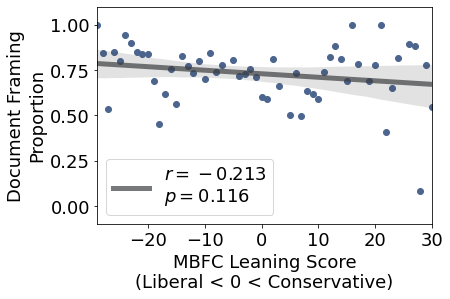

Mental illness
Average Document Framing
[r=-0.212, p=0.11691032033939605]


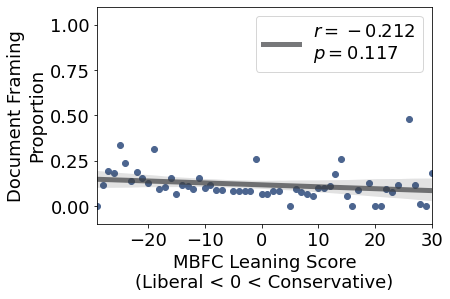

Criminal record
Average Document Framing
[r=-0.319, p=0.016471834075268695]


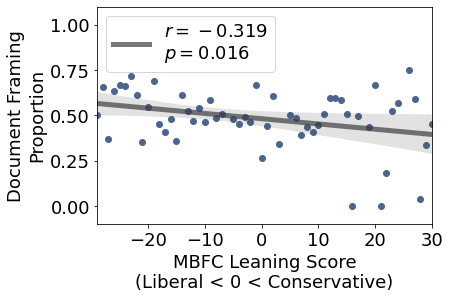

Fleeing
Average Document Framing
[r=0.232, p=0.08514988588968145]


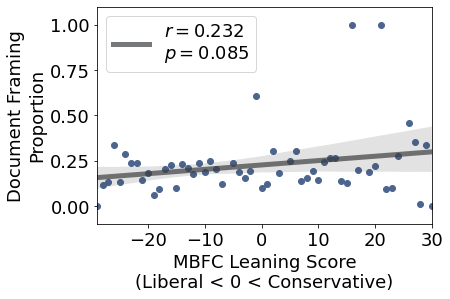

Video
Average Document Framing
[r=-0.107, p=0.43319722753235673]


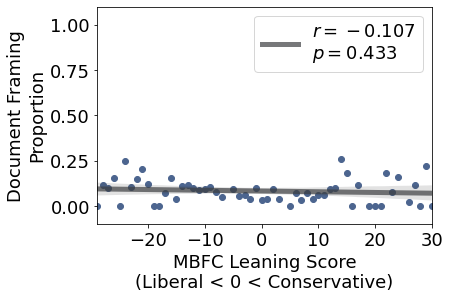

Age
Average Document Framing
[r=-0.008, p=0.9560577678261878]


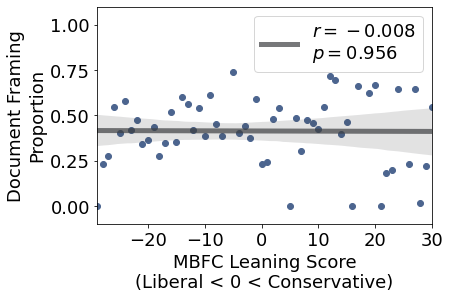

Gender
Average Document Framing
[r=0.023, p=0.8650480454575427]


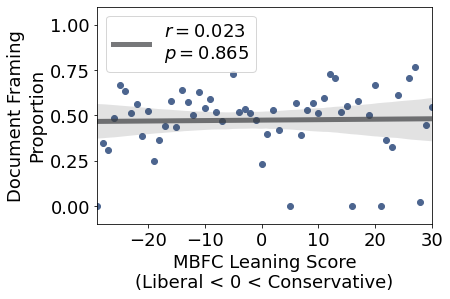

Unarmed
Average Document Framing
[r=-0.303, p=0.023216015691284373]


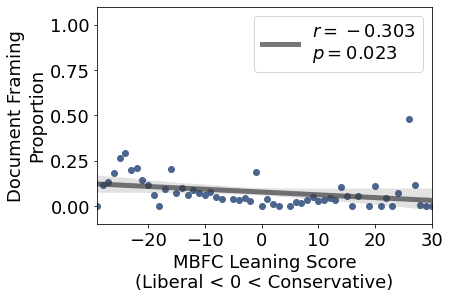

Armed
Average Document Framing
[r=0.007, p=0.9571740182557649]


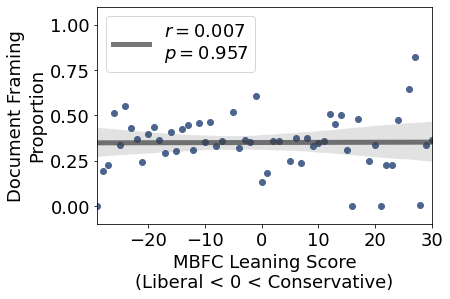

Race
Average Document Framing
[r=-0.667, p=1.9967079075878113e-08]


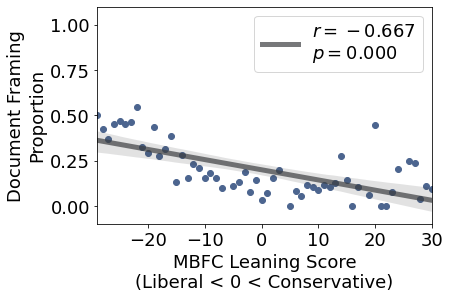

Official report
Average Document Framing
[r=-0.160, p=0.23835436766572082]


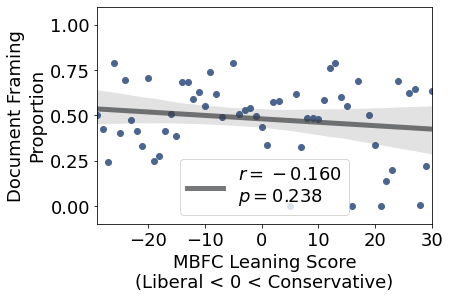

Interview
Average Document Framing
[r=-0.198, p=0.1434336651014456]


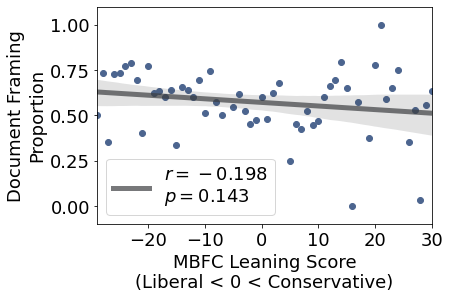

Attack
Average Document Framing
[r=-0.040, p=0.7692504684517106]


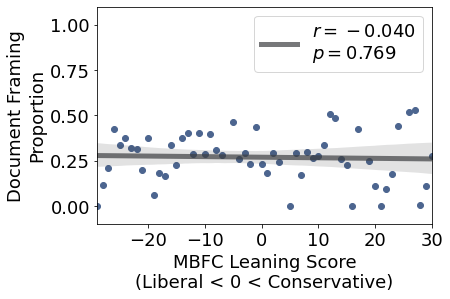

Systemic
Average Document Framing
[r=-0.283, p=0.0347724803255084]


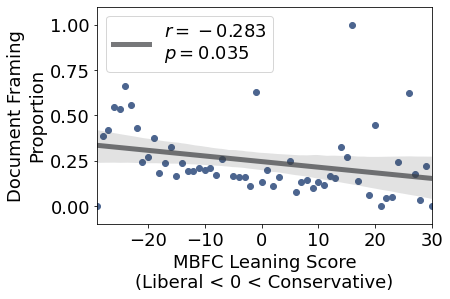

In [20]:
leaning_avg = shootings_bias.groupby('leaning').mean()
leaning_avg['leaning'] = leaning_avg.index

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

SIGFIGS = 3
 
# plot

font = {'family' : 'normal',
        'size'   : 18}

plt.rc('font', **font)

frmt = r'''$r=%(pears)s$
$p=%(proba)s$'''

FRAMES = ['found.legal_language', 'found.mental_illness',
       'found.criminal_record', 'found.fleeing', 'found.video', 'found.age',
       'found.gender', 'found.unarmed', 'found.armed', 'found.race',
       'found.official_report', 'found.interview', 'found.attack',
       'found.systemic']
for frame in FRAMES:
    
    r,p = stats.pearsonr(leaning_avg['leaning'].values, leaning_avg[frame].values)
    f = "{:.%sf}" % SIGFIGS
    p_str = f.format(p)
    r_str = f.format(r)
    
    plt.scatter(leaning_avg['leaning'].values, leaning_avg[frame].values, color='#4c658f')
    ax = sns.regplot(x=leaning_avg['leaning'], 
                y=(leaning_avg[frame]), 
                line_kws={"color":"#3d3f42","alpha":0.7,"lw":5},
                label= frmt % {'pears': r_str, 'proba': p_str},
                scatter=False
               )#.set_title('%s\nAverage Document Framing\n[r=%s]' % (' '.join(frame.split('.')[-1].split('_')).capitalize(),r_str))
    print('%s\nAverage Document Framing\n[r=%s, p=%s]' % (' '.join(frame.split('.')[-1].split('_')).capitalize(),
                                                          r_str,
                                                          p))
    ax.set(xlabel="MBFC Leaning Score\n(Liberal < 0 < Conservative)", ylabel = "Document Framing\nProportion")
    plt.ylim(-0.1, 1.1)
    plt.legend()
    plt.show()

Criminal record
Average Document Framing
[r=-0.319, p=0.016]
Unarmed
Average Document Framing
[r=-0.303, p=0.023]
Race
Average Document Framing
[r=-0.667, p=0.000]


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


Systemic
Average Document Framing
[r=-0.283, p=0.035]


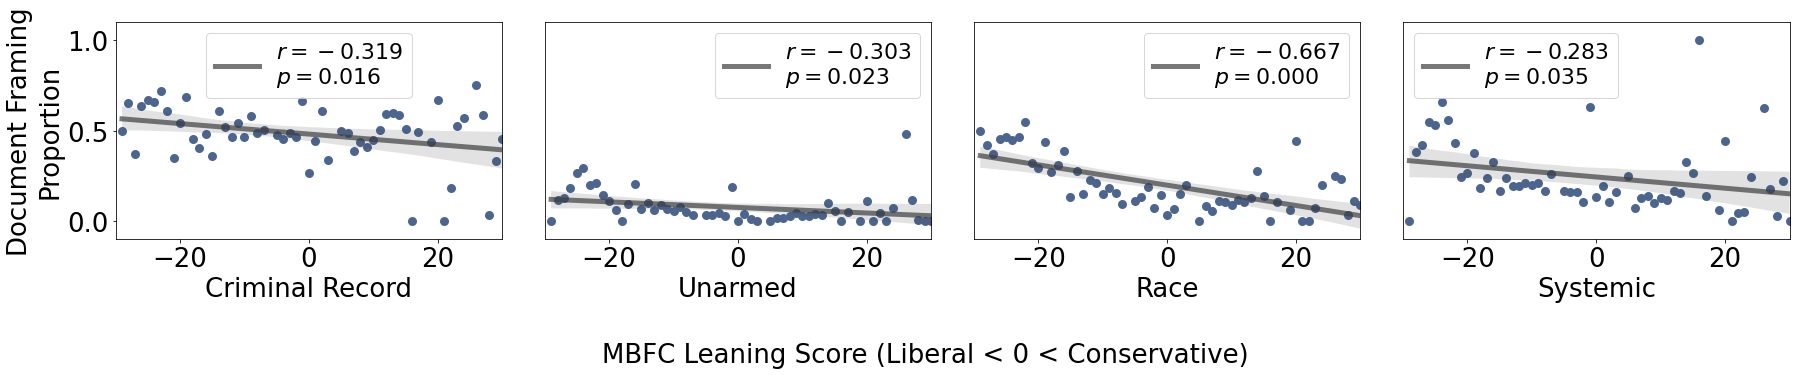

In [21]:
leaning_avg = shootings_bias.groupby('leaning').mean()
leaning_avg['leaning'] = leaning_avg.index

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib import gridspec

SIGFIGS = 3
 
# plot

font = {'family' : 'normal',
        'size'   : 26}

plt.rc('font', **font)

frmt = r'''$r=%(pears)s$
$p=%(proba)s$'''

fig = plt.figure(figsize=(30,4))
gs = gridspec.GridSpec(ncols=4, nrows=1,width_ratios=[1,1,1,1], wspace=0.11) # 2, 8

names = ['Criminal Record', 'Unarmed', 'Race', 'Systemic']
for i, frame in enumerate(['found.criminal_record', 'found.unarmed', 'found.race', 'found.systemic']):
    
    ax = fig.add_subplot(gs[i])
    
    r,p = stats.pearsonr(leaning_avg['leaning'].values, leaning_avg[frame].values)
    f = "{:.%sf}" % SIGFIGS
    p_str = f.format(p)
    r_str = f.format(r)
    
    ax.scatter(leaning_avg['leaning'].values, leaning_avg[frame].values, color='#4c658f', linewidths=3)
    sns.regplot(x=leaning_avg['leaning'], 
                y=(leaning_avg[frame]), 
                line_kws={"color":"#3d3f42","alpha":0.7,"lw":5},
                label= frmt % {'pears': r_str, 'proba': p_str},
                scatter=False,
                ax=ax,
               )#.set_title('%s\nAverage Document Framing\n[r=%s]' % (' '.join(frame.split('.')[-1].split('_')).capitalize(),r_str))
    if i!=0:
        ax.set(xlabel=names[i], ylabel=None)
        ax.get_yaxis().set_visible(False)
    else:
        ax.set(xlabel=names[i], ylabel='Document Framing\nProportion')
    print('%s\nAverage Document Framing\n[r=%s, p=%s]' % (' '.join(frame.split('.')[-1].split('_')).capitalize(),r_str, p_str))
    ax.legend(fontsize=22)
    ax.set_ylim(-0.1, 1.1)
    ax.set_xlim(-30, 30)
fig.text(0.5, -0.3, 'MBFC Leaning Score (Liberal < 0 < Conservative)', ha='center', fontsize=26)
plt.savefig('img/regressions.pdf', dpi=600, bbox_inches='tight', pad_inches=0.5)
plt.show()

## Moral framing

In [42]:
SHOOTINGS_FILE = 'data/prepared/shootings/shooting_frames_.csv'
shootings = pd.read_csv(SHOOTINGS_FILE)

In [43]:
from numpy import var
from numpy import mean
from math import sqrt
from scipy.stats import mannwhitneyu,ttest_ind
import scipy

def latex_float(num, sigfigs=3):
    f = "{0:.%se}" % sigfigs
    float_str = f.format(num)
    if "e" in float_str:
        base, exponent = float_str.split("e")
        return r"{0} \times 10^{{{1}}}".format(base, int(exponent))
    else:
        return float_str

def cohend(d1, d2):
    # calculate the size of samples
    n1, n2 = len(d1), len(d2)
    # calculate the variance of the samples
    s1, s2 = var(d1, ddof=1), var(d2, ddof=1)
    # calculate the pooled standard deviation
    s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
    # calculate the means of the samples
    u1, u2 = mean(d1), mean(d2)
    # calculate Cohen's D
    return (u1 - u2) / s

def format_sig(p1, p2, p, d, title='', sigfigs=3, full_p=False, n1=None, n2=None, scientific=False):
    f = "{:.%sf}" % sigfigs
    prob = f.format(p)
    L = f.format(p1)
    R = f.format(p2)
    D = f.format(d)
    
    if scientific:
        L = latex_float(p1, sigfigs)
        R = latex_float(p2, sigfigs)
    
    stars = ""
    if p<0.05:
        stars += '*'
    if p<0.01:
        stars += '*'
    if p<0.001:
        stars += '*'
        
    if full_p:
        stars += " (p=%s)" % p
        
    sizes = ""
    if n1 and n2:
        sizes = " & %s & %s" % (n1, n2)
    
    if title:
        return "%s %s & %s & %s%s & %s \\\\" % (' '.join(title.split('_')).capitalize(), stars, L, R, sizes, D)
    else:
        return "%s & %s & %s%s & %s \\\\" % (stars, L, R, sizes, D)

def test_binom(d1, d2, alpha=0.05, title="", sigfigs=3, full_p=False, include_n=False):
    n1, n2 = len(d1), len(d2)
    p1, p2 = sum(d1)/n1, sum(d2)/n2
    
    p = (n1*p1 + n2*p2) / (n1 + n2)
    Z = (p1-p2) / np.sqrt(p*(1-p)*((1/n1)+(1/n2)))
    p_value = scipy.stats.norm.sf(abs(Z))*2
    
    D = cohend(d2,d1)
    
    if include_n:
        print(format_sig(p1, p2, p_value, D, title, sigfigs, full_p, n1, n2))
    else:
        print(format_sig(p1, p2, p_value, D, title, sigfigs, full_p))
    
def test(d1, d2, alpha=0.05, title="", sigfigs=3, include_n=False, full_p=False, scientific=False):
    stat, p = mannwhitneyu(d1, d2, alternative='two-sided') #ttest_ind(d1, d2, equal_var=False, nan_policy='omit')
    D = cohend(d2,d1)
    
    if include_n:
        print(format_sig(np.nanmean(d1), np.nanmean(d2), p, D, title, sigfigs, full_p=full_p, n1=len(d1), n2=len(d2), scientific=scientific))
    else:
        print(format_sig(np.nanmean(d1), np.nanmean(d2), p, D, title, sigfigs, full_p=full_p, scientific=scientific))

def moral_category_name(label):
    who, cat = label.split('.')
    
    if len(cat.split('Vice'))==2:
        cat = cat.split('Vice')[0].lower()
        if cat == 'care':
            cat = 'harm'
        elif cat == 'fairness':
            cat = 'cheating'
        elif cat == 'ingroup':
            cat = 'betrayal'
        elif cat == 'authority':
            cat = 'subversion'
        elif cat=='purity':
            cat = 'degradation'
        elif cat == 'general':
            cat = 'vice'
    else:
        cat = cat.split('Virtue')[0].lower()
        if cat == 'ingroup':
            cat = 'loyalty'
        elif cat=='sanctity':
            cat = 'degradation'
        elif cat == 'general':
            cat = 'virtue'
    return cat, who

from scipy.stats import mannwhitneyu,ttest_ind

lib = shootings[shootings['leaning']==0]
cons = shootings[shootings['leaning']==2]

lib_officer_means = []
cons_officer_means = []
lib_officer_stds = []
cons_officer_stds = []

def st_err_of_mean(vals):
    return np.std(vals) / np.sqrt(len(vals))

print("---OFFICER---")
for moral in ['officer.CareVirtue', 'officer.CareVice', 'officer.FairnessVirtue', 
              'officer.FairnessVice', 'officer.IngroupVirtue', 'officer.IngroupVice', 
              'officer.AuthorityVirtue', 'officer.AuthorityVice', 'officer.PurityVirtue', 
              'officer.PurityVice', 'officer.GeneralVirtue', 'officer.GeneralVice']:
    L = (lib[moral].values > 0).astype(int)
    R = (cons[moral].values > 0).astype(int)
    
    title, who = moral_category_name(moral)
    test(L,R,title=title, full_p=True, scientific=True)
    
    lib_officer_means.append(np.mean(L))
    lib_officer_stds.append(st_err_of_mean(L))
    cons_officer_means.append(np.mean(R))
    cons_officer_stds.append(st_err_of_mean(R))
    
print()
print("---VICTIM---")
lib_victim_means = []
cons_victim_means = []
lib_victim_stds = []
cons_victim_stds = []
for moral in ['victim.CareVirtue', 'victim.CareVice', 'victim.FairnessVirtue', 
              'victim.FairnessVice', 'victim.IngroupVirtue', 'victim.IngroupVice', 
              'victim.AuthorityVirtue', 'victim.AuthorityVice', 'victim.PurityVirtue', 
              'victim.PurityVice', 'victim.GeneralVirtue', 'victim.GeneralVice']:
    L = (lib[moral].values > 0).astype(int)
    R = (cons[moral].values > 0).astype(int)
    
    title, who = moral_category_name(moral)
    test(L,R,title=title, full_p=True, scientific=True)
    
    lib_victim_means.append(np.mean(L))
    cons_victim_means.append(np.mean(R))
    lib_victim_stds.append(st_err_of_mean(L))
    cons_victim_stds.append(st_err_of_mean(R))

---OFFICER---
Care  (p=0.9890129500391325) & 4.404 \times 10^{-2} & 4.391 \times 10^{-2} & -0.001 \\
Harm  (p=0.21230996546408432) & 2.330 \times 10^{-1} & 2.565 \times 10^{-1} & 0.055 \\
Fairness ** (p=0.002387718725378466) & 3.761 \times 10^{-2} & 1.597 \times 10^{-2} & -0.133 \\
Cheating * (p=0.011085621472458479) & 6.422 \times 10^{-3} & 0.000 \times 10^{0} & -0.111 \\
Loyalty  (p=0.21397967140660257) & 4.495 \times 10^{-2} & 5.689 \times 10^{-2} & 0.054 \\
Betrayal  (p=0.6699397847305816) & 1.193 \times 10^{-2} & 9.980 \times 10^{-3} & -0.019 \\
Authority  (p=0.11156945846067465) & 1.211 \times 10^{-1} & 1.447 \times 10^{-1} & 0.070 \\
Subversion * (p=0.03938181774819727) & 1.835 \times 10^{-2} & 7.984 \times 10^{-3} & -0.090 \\
Purity  (p=0.21517022010923648) & 8.257 \times 10^{-3} & 3.992 \times 10^{-3} & -0.054 \\
Degradation  (p=0.06727301336447024) & 1.835 \times 10^{-2} & 8.982 \times 10^{-3} & -0.080 \\
Virtue  (p=0.33298970834796926) & 1.193 \times 10^{-2} & 1.697 \times 1

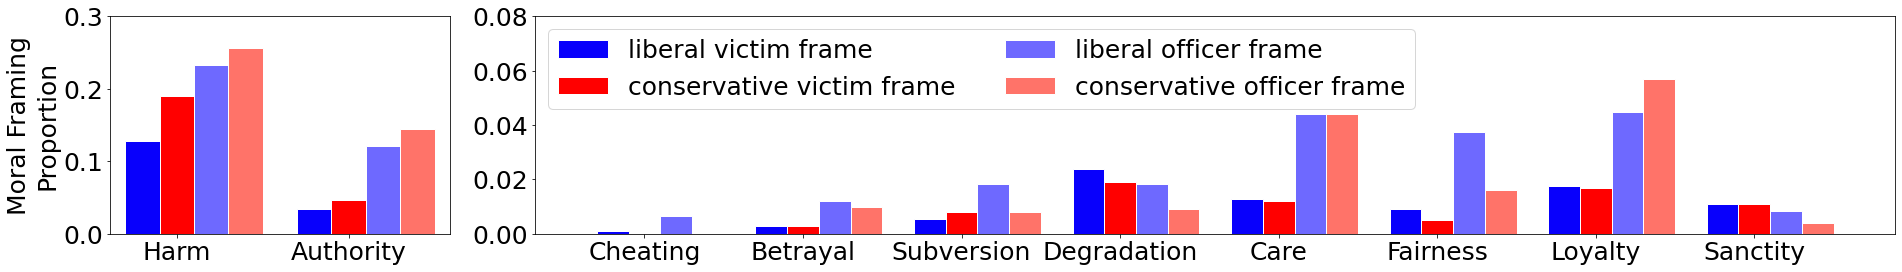

In [27]:
from matplotlib import gridspec

names = np.array(['Care', 'Harm', 'Fairness',
       'Cheating', 'Loyalty', 'Betrayal', 'Authority', 'Subversion',
       'Sanctity', 'Degradation'])

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 25})
fig = plt.figure(figsize=(32,4))

gs = gridspec.GridSpec(ncols=2, nrows=1,width_ratios=[1,4], wspace=0.1) # 2, 8

ax = fig.add_subplot(gs[0])

ax.set_ylim(0, 0.3)
 
# set width of bar
barWidth = 0.20
 
# Set position of bar on X axis
r1 = np.arange(2)
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
 
# Make the plot
ax.bar(r1, np.array(lib_victim_means)[[1,6]], color='#0800fc', width=barWidth, edgecolor='white', label='liberal victim frame')
ax.bar(r2, np.array(cons_victim_means)[[1,6]], color='#ff0000', width=barWidth, edgecolor='white', label='conservative victim frame')
ax.bar(r3, np.array(lib_officer_means)[[1,6]], color='#6e69ff', width=barWidth, edgecolor='white', label='liberal officer frame')
ax.bar(r4, np.array(cons_officer_means)[[1,6]], color='#ff7369', width=barWidth, edgecolor='white', label='conservative officer frame')
 
# Add xticks on the middle of the group bars
plt.ylabel('Moral Framing\nProportion')
ax.set_xticks([r + barWidth for r in range(2)])
ax.set_xticklabels(names[[1,6]])

ax = fig.add_subplot(gs[1])

ax.set_ylim(0, 0.08)
 
# set width of bar
barWidth = 0.20
 
ORDER = [3,5,7,9,0,2,4,8] #[0,2,3,4,5,7,8,9]
    
# Set position of bar on X axis
r1 = np.arange(8)
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
 
# Make the plot
ax.bar(r1, np.array(lib_victim_means)[ORDER], color='#0800fc', width=barWidth, edgecolor='white', label='liberal victim frame')
ax.bar(r2, np.array(cons_victim_means)[ORDER], color='#ff0000', width=barWidth, edgecolor='white', label='conservative victim frame')
ax.bar(r3, np.array(lib_officer_means)[ORDER], color='#6e69ff', width=barWidth, edgecolor='white', label='liberal officer frame')
ax.bar(r4, np.array(cons_officer_means)[ORDER], color='#ff7369', width=barWidth, edgecolor='white', label='conservative officer frame')
 
# Add xticks on the middle of the group bars
#plt.ylabel('Average\nMoral Frame Score ')
ax.set_xticks([r + barWidth for r in range(8)])
ax.set_xticklabels(names[ORDER])
# Create legend & Show graphic
plt.legend(ncol=2, loc="upper left")
plt.savefig('img/moral_foundations_COUNTS.pdf', dpi=600)
plt.show()

## Passive Verbs

#### prepare lists of passives for linguistic analysis

In [25]:
from helper_functions import *
from tqdm import tqdm

In [26]:
shootings = pd.read_csv(SHOOTINGS_FILE)

In [27]:
# We need to convert the string-represented lists of passives into literal lists
from ast import literal_eval
for col_name in ['victim_agentive_passive_heads',
       'victim_agentive_officer_passive_heads',
       'victim_agentless_passive_heads']:
    print(col_name)
    shootings[col_name] = [literal_eval(x) for x in shootings[col_name].values]

victim_agentive_passive_heads
victim_agentive_officer_passive_heads
victim_agentless_passive_heads


In [28]:
# We can normalize by document length here
normalized_agentless_passive_counts = []
for i, row in tqdm(shootings.iterrows(), total=len(shootings)):
    count = len(row['victim_agentless_passive_heads'])
    doc_length = row['num_words']
    if doc_length:
        normalized_agentless_passive_counts.append(count / doc_length)
    else:
        normalized_agentless_passive_counts.append(-1*count)
normalized_agentless_passive_counts = np.array(normalized_agentless_passive_counts)
shootings['normalized_agentless_passive_counts'] = normalized_agentless_passive_counts

100%|██████████| 2092/2092 [00:00<00:00, 14520.46it/s]


In [29]:
# We can count how many verbs are 'attacking' verbs in the following set
attack_verbs = {'shoot', 'kill', 'murder', 'fire', 'stab', 'lunge', 
                'confront', 'attack', 'strike', 'injure', 'harm'}
violent_agentless_passive_counts = []
normalized_violent_agentless_passive_counts = []
for i, row in tqdm(shootings.iterrows(), total=len(shootings)):
    count = len([x for x in row['victim_agentless_passive_heads'] if nlp(x[0])[0].lemma_ in attack_verbs])
    doc_length = row['num_words']
    violent_agentless_passive_counts.append(count)
    if doc_length:
        normalized_violent_agentless_passive_counts.append(count / doc_length)
    else:
        normalized_violent_agentless_passive_counts.append(-1*count)
shootings['normalized_violent_agentless_passive_counts'] = normalized_violent_agentless_passive_counts
shootings['violent_agentless_passive_counts'] = violent_agentless_passive_counts

100%|██████████| 2092/2092 [00:19<00:00, 108.24it/s]


In [30]:
normalized_agentive_passive_counts = []
for i, row in tqdm(shootings.iterrows(), total=len(shootings)):
    count = len(row['victim_agentive_passive_heads'])
    doc_length = row['num_words']
    if doc_length:
        normalized_agentive_passive_counts.append(count / doc_length)
    else:
        normalized_agentive_passive_counts.append(-1*count)
normalized_agentive_passive_counts = np.array(normalized_agentive_passive_counts)
shootings['normalized_agentive_passive_counts'] = normalized_agentive_passive_counts

100%|██████████| 2092/2092 [00:00<00:00, 15798.15it/s]


In [31]:
normalized_agentive_officer_passive_counts = []
for i, row in tqdm(shootings.iterrows(), total=len(shootings)):
    count = len(row['victim_agentive_officer_passive_heads'])
    doc_length = row['num_words']
    if doc_length:
        normalized_agentive_officer_passive_counts.append(count / doc_length)
    else:
        normalized_agentive_officer_passive_counts.append(-1*count)
normalized_agentive_officer_passive_counts = np.array(normalized_agentive_officer_passive_counts)
shootings['normalized_agentive_officer_passive_counts'] = normalized_agentive_officer_passive_counts

100%|██████████| 2092/2092 [00:00<00:00, 16063.33it/s]


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


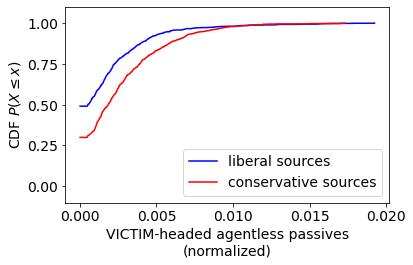

KstestResult(statistic=0.21046164551630683, pvalue=1.7763568394002505e-15)
*** & 1.579 \times 10^{-3} & 2.550 \times 10^{-3} & 0.367 \\


In [32]:
## Conservative sources use more VICTIM-headed agentlesss passive constructions 
lib = shootings[shootings['leaning']==0]
cons = shootings[shootings['leaning']==2]

L = lib['normalized_agentless_passive_counts'].values
R = cons['normalized_agentless_passive_counts'].values

print(ks_test(L, R, num_bins=None, x_lbl='VICTIM-headed agentless passives\n(normalized)', y_lbl='CDF $P(X \leq x)$', title='', plabel='liberal sources', nlabel='conservative sources', fn='img/normalized_passive_cdf.pdf', alpha=0.05, dval=False))
test(L, R, alpha=0.05, title="", sigfigs=3, include_n=False, full_p=False, scientific=True)

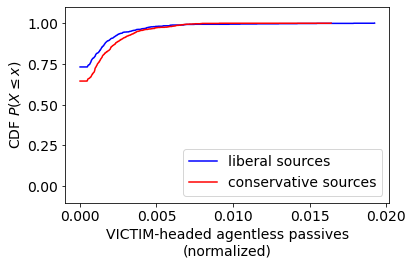

KstestResult(statistic=0.09690893442472852, pvalue=9.990955924565892e-05)
*** & 6.213 \times 10^{-4} & 8.133 \times 10^{-4} & 0.121 \\


In [41]:
## Conservative sources use more violent VICTIM-headed agentlesss passive constructions 
lib = shootings[shootings['leaning']==0]
cons = shootings[shootings['leaning']==2]

L = lib['normalized_violent_agentless_passive_counts'].values
R = cons['normalized_violent_agentless_passive_counts'].values

print(ks_test(L, R, num_bins=None, x_lbl='VICTIM-headed agentless passives\n(normalized)', y_lbl='CDF $P(X \leq x)$', title='', plabel='liberal sources', nlabel='conservative sources', fn='img/normalized_passive_cdf.pdf', alpha=0.05, dval=False))
test(L, R, alpha=0.05, title="", sigfigs=3, include_n=False, full_p=False, scientific=True)

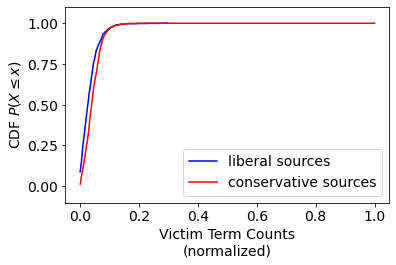

KstestResult(statistic=0.21254371989965024, pvalue=1.7763568394002505e-15)
*** & 3.27 \times 10^{-2} & 4.39 \times 10^{-2} & 0.31 \\


In [34]:
## Liberal sources discuss the victim less overall
def get_victim_term_counts(df, normalize=False):
    term_counts = []
    all_tokens = set()
    for _,row in df.iterrows():
        if row['found.victim_tokens']=='set()':
            term_counts.append(0)
        else:
            tokens = row['found.victim_tokens'].replace('{', '').replace('}', '').split(', ')
            all_tokens.update(set([t.lower() for t in tokens]))
            term_counts.append(len(tokens))        
    if normalize:
        return np.nan_to_num(np.array(term_counts) / df['num_words'])
    else:
        return np.array(term_counts)

lib = shootings[shootings['leaning']==0]
cons = shootings[shootings['leaning']==2]

L=get_victim_term_counts(lib, normalize=True)
R=get_victim_term_counts(cons, normalize=True)
print(ks_test(L, R, num_bins=None, x_lbl='Victim Term Counts\n(normalized)', y_lbl='CDF $P(X \leq x)$', title='', plabel='liberal sources', nlabel='conservative sources', fn='img/normalized_passive_cdf.pdf', alpha=0.05, dval=False))
test(L, R, alpha=0.05, title="", sigfigs=2, include_n=False, full_p=False, scientific=True)

/nethome/cziems3/miniconda3/envs/coref/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/nethome/cziems3/miniconda3/envs/coref/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


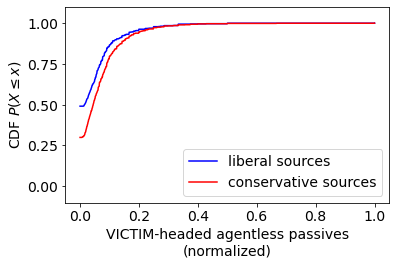

KstestResult(statistic=0.19142449046860407, pvalue=1.7763568394002505e-15)
*** & 4.67 \times 10^{-2} & 6.47 \times 10^{-2} & 0.23 \\


In [35]:
## Conservative sources also use proportionally more VICTIM-headed agentlesss passive constructions 
lib = shootings[shootings['leaning']==0]
cons = shootings[shootings['leaning']==2]

L = np.nan_to_num(np.array([len(lst) for lst in lib['victim_agentless_passive_heads'].values]) / get_victim_term_counts(lib))
R = np.nan_to_num(np.array([len(lst) for lst in cons['victim_agentless_passive_heads'].values]) / get_victim_term_counts(cons))

print(ks_test(L, R, num_bins=None, x_lbl='VICTIM-headed agentless passives\n(normalized)', y_lbl='CDF $P(X \leq x)$', title='', plabel='liberal sources', nlabel='conservative sources', fn='img/normalized_passive_cdf.pdf', alpha=0.05, dval=False))
test(L, R, alpha=0.05, title="", sigfigs=2, include_n=False, full_p=False, scientific=True)

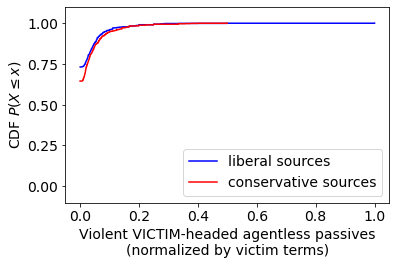

KstestResult(statistic=0.0873995129008039, pvalue=0.0006309990874839855)
*** & 1.81 \times 10^{-2} & 2.20 \times 10^{-2} & 0.08 \\


In [36]:
## Conservative sources also use proportionally more violent VICTIM-headed agentlesss passive constructions 
lib = shootings[shootings['leaning']==0]
cons = shootings[shootings['leaning']==2]

L = np.nan_to_num( lib['violent_agentless_passive_counts'] / get_victim_term_counts(lib))
R = np.nan_to_num( cons['violent_agentless_passive_counts'] / get_victim_term_counts(cons))

print(ks_test(L, R, num_bins=None, x_lbl='Violent VICTIM-headed agentless passives\n(normalized by victim terms)', y_lbl='CDF $P(X \leq x)$', title='', plabel='liberal sources', nlabel='conservative sources', fn='img/normalized_passive_cdf.pdf', alpha=0.05, dval=False))
test(L, R, alpha=0.05, title="", sigfigs=2, include_n=False, full_p=False, scientific=True)

## Modals

In [37]:
import re
regexes = {
    'MUST': r"(\bmust(n['‘’`]?t?)?\b)|(\bmust['‘’`]?ve\b)",
    'SHOULD': r"(\bshould(n['‘’`]?t?)?\b)|(\bshould['‘’`]?ve\b)",
    'NEED TO': r"(\bneed to\b)|(\bneeds to\b)",
    'HAVE TO': r"(\bhave to\b)|(\bhas to\b)",
}

In [38]:
from tqdm import tqdm
modals = {}
for i, row in tqdm(shootings.iterrows(), total=len(shootings)):
    modals[i] = {}
    for key, val in regexes.items():
        count = len(re.findall(val, row['text']))
        doc_length = row['num_words']
        if doc_length:
            modals[i][key] = (count / doc_length)
        else:
            modals[i][key] = None
modals_df = pd.DataFrame().from_dict(modals,orient='index')

100%|██████████| 2092/2092 [00:02<00:00, 929.07it/s] 


In [39]:
modals_df.fillna(0,inplace=True)
shootings[['MUST', 'SHOULD', 'NEED TO', 'HAVE TO']] = modals_df[['MUST', 'SHOULD', 'NEED TO', 'HAVE TO']]

In [40]:
lib = shootings[shootings['leaning']==0].copy()
cons = shootings[shootings['leaning']==2].copy()
for frame in ['MUST', 'SHOULD', 'NEED TO', 'HAVE TO']:
    L = (lib[frame].values)
    R = (cons[frame].values)
    
    test(L,R, title=frame, scientific=True, full_p=True, sig)

Must ** (p=0.0025522162936098907) & 2.091 \times 10^{-4} & 1.027 \times 10^{-4} & -0.132 \\
Should *** (p=1.6263236731842376e-10) & 4.442 \times 10^{-4} & 2.040 \times 10^{-4} & -0.262 \\
Need to *** (p=4.3757928289899e-09) & 2.636 \times 10^{-4} & 1.148 \times 10^{-4} & -0.190 \\
Have to *** (p=2.4230587496364686e-11) & 4.090 \times 10^{-4} & 1.754 \times 10^{-4} & -0.196 \\


## temporal analysis

In [4]:
from helper_functions import *
import datetime
shootings = pd.read_csv('data/prepared/shootings/shooting_frames.csv')

In [5]:
shootings_binary = shootings.copy()
shootings_binary['date'] = pd.to_datetime(shootings['date'])
shootings_binary[['found.mental_illness','found.criminal_record','found.fleeing',
                            'found.video','found.age', 'found.gender','found.unarmed','found.armed',
                            'found.race','found.official_report', 'found.interview','found.attack',
                            'found.systemic','found.legal_language']] = (shootings_binary[['found.mental_illness','found.criminal_record','found.fleeing',
                            'found.video','found.age', 'found.gender','found.unarmed','found.armed',
                            'found.race','found.official_report', 'found.interview','found.attack',
                            'found.systemic','found.legal_language']].values<np.inf).astype(int)
shootings_binary[['mental_illness', 
                  'armed', 'attack', 
                  'fleeing', 'video']] = shootings_binary[['mental_illness', 
                                                           'armed', 'attack', 
                                                           'fleeing', 'video']].fillna(0).astype(int)
shootings_binary['count'] = 1

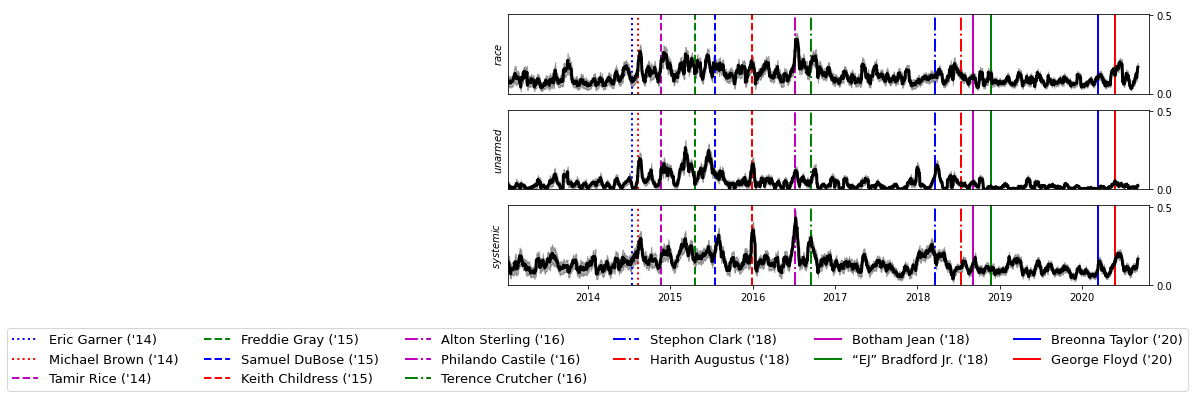

In [6]:
df, col_names, title, save = shootings_binary.copy(), ['race', 'unarmed', 'systemic'], "", True

high_profile = ['Eric Garner', 'Michael Brown', 
                'Tamir E. Rice', 'Freddie Gray',
                'Samuel Dubose', 'Keith Childress',
                'Alton Sterling', 'Philando Castile', 
                'Terence Crutcher', 'Stephon Clark', 
                'Harith L. Augustus', "Botham Shem Jean", 
                'Emantic "EJ" Fitzgerald Bradford Jr.',
                'Breonna Taylor', 'George "Big Floyd" Floyd'
               ]

fig, axes = plt.subplots(len(col_names), figsize=(11.5,5.0)) # figsize=(11.5,6.5)
plt.setp(axes, xlim=(datetime.datetime(2013,1, 10), datetime.datetime(2020,10, 25)), ylim=(0, 0.51))
plt.rcParams.update({'font.size': 18})

for i, col_name in enumerate(col_names):
    ax = axes[i]
    ax.yaxis.tick_right()
    ax.set(ylabel="$\t{%s}$" % col_name)
    if i<len(col_names)-1:
        ax.set_xticks([])

    df = df[[name not in high_profile for name in df['name'].values]].copy()
    dated_binary = df.groupby('date').sum()[['found.mental_illness','found.criminal_record','found.fleeing',
                                                       'found.video','found.age', 'found.gender','found.unarmed','found.armed',
                                                       'found.race','found.official_report', 'found.interview','found.attack',
                                                       'found.systemic','found.legal_language','mental_illness', 'armed', 
                                                       'attack', 'fleeing', 'video', 'count']].copy()
    resampled = dated_binary.rolling(15, min_periods=1).sum()
    p = resampled['found.'+col_name] / resampled['count'] 
    confidence = 1.96*np.sqrt((p*(1-p))/resampled['count'])

    # sources: https://abc7chicago.com/breonna-taylor-death-say-her-name-his-black-man-killed/6236298/
    #          https://www.wbur.org/hereandnow/2016/07/11/america-police-shooting-timeline
    #          https://www.cbc.ca/news/world/list-police-related-deaths-usa-1.4438618
    #          https://www.usatoday.com/story/news/nation-now/2018/03/29/police-killings-black-men-us-and-what-happened-officers/469467002/
    #          https://missoulian.com/news/national/a-look-at-high-profile-police-shootings-in-the-united-states/collection_2b947b85-b922-5ebe-94dc-ebe64f555c09.html#14
    #          https://www.bbc.com/news/world-us-canada-52905408
    ax.axvline(x=datetime.datetime(2014,7, 17), linewidth=2, color='b', linestyle=':', label="Eric Garner ('14)") # Eric Garner
    ax.axvline(x=datetime.datetime(2014,8, 9), linewidth=2, color='r', linestyle=':', label="Michael Brown ('14)") # Michael Brown
    ax.axvline(x=datetime.datetime(2014,11, 22), linewidth=2, color='m', linestyle='--', label="Tamir Rice ('14)") # Tamir Rice
    ax.axvline(x=datetime.datetime(2015,4, 19), linewidth=2, color='g', linestyle='--', label="Freddie Gray ('15)") # Freddie Carlos Gray
    ax.axvline(x=datetime.datetime(2015,7, 19), linewidth=2, color='b', linestyle='--', label="Samuel DuBose ('15)") # Samuel DuBose
    ax.axvline(x=datetime.datetime(2015,12, 31), linewidth=2, color='r', linestyle='--', label="Keith Childress ('15)") # Keith Childress
    ax.axvline(x=datetime.datetime(2016,7, 6), linewidth=2, color='m', linestyle='-.', label="Alton Sterling ('16)") # Philando Castile
    ax.axvline(x=datetime.datetime(2016,7, 6), linewidth=2, color='m', linestyle='-.', label="Philando Castile ('16)") # Philando Castile
    ax.axvline(x=datetime.datetime(2016,9, 16), linewidth=2, color='g', linestyle='-.', label="Terence Crutcher ('16)") # Terence Crutcher
    ax.axvline(x=datetime.datetime(2018,3, 18), linewidth=2, color='b', linestyle='-.', label="Stephon Clark ('18)") # Stephon Clark 
    ax.axvline(x=datetime.datetime(2018,7, 14), linewidth=2, color='r', linestyle='-.', label="Harith Augustus ('18)") # Harith Augustus
    ax.axvline(x=datetime.datetime(2018,9, 6), linewidth=2, color='m', linestyle='-', label="Botham Jean ('18)") # Emantic “EJ” Fitzgerald Bradford Jr.
    ax.axvline(x=datetime.datetime(2018,11, 22), linewidth=2, color='g', linestyle='-', label="“EJ” Bradford Jr. ('18)") # Emantic “EJ” Fitzgerald Bradford Jr.
    ax.axvline(x=datetime.datetime(2020,3, 13), linewidth=2, color='b', linestyle='-', label="Breonna Taylor ('20)") # Breonna Taylor
    ax.axvline(x=datetime.datetime(2020,5, 25), linewidth=2, color='r', linestyle='-', label="George Floyd ('20)") # George Floyd

    ax.plot(p.index, p.values, linewidth=3, color='black') # label='frames'
    ax.fill_between(p.index, 
                     p.values-confidence.values, 
                     p.values+confidence.values,
                     alpha=.3, color='black') # label='95%\nconfidence\ninterval',

fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False, )

#plt.xlabel("Year")
#plt.ylabel("Average Document Frequency")
ax.legend(loc='lower left', bbox_to_anchor=(-0.79, -1.4),ncol=6,fontsize=13)
plt.savefig('img/temporal_alt.png', dpi=600, bbox_inches='tight', pad_inches=0.5)
plt.show()

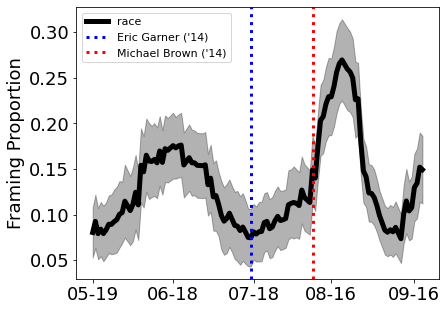

In [7]:
col_name = 'race'
df = df[[name not in high_profile for name in df['name'].values]].copy()
dated_binary = df.groupby('date').sum()[['found.mental_illness','found.criminal_record','found.fleeing',
                                                   'found.video','found.age', 'found.gender','found.unarmed','found.armed',
                                                   'found.race','found.official_report', 'found.interview','found.attack',
                                                   'found.systemic','found.legal_language','mental_illness', 'armed', 
                                                   'attack', 'fleeing', 'video', 'count']].copy()
resampled = dated_binary.rolling(15, min_periods=1).sum()
resampled = resampled[(resampled.index>=pd.to_datetime('2014-05-19')) & (resampled.index<=pd.to_datetime('2014-09-19'))].copy()
p = resampled['found.'+col_name] / resampled['count'] 
confidence = 1.96*np.sqrt((p*(1-p))/resampled['count'])
plt.figure(figsize=(6.5,5.0))
plt.plot(p.index, p.values, linewidth=5, color='black', label='race') # label='frames'
plt.fill_between(p.index, 
                 p.values-confidence.values, 
                 p.values+confidence.values,
                 alpha=.3, color='black') 

plt.ylabel("Framing Proportion")
plt.xticks(ticks=p.index[::28], labels=p.index[::28].strftime('%m-%d'))
plt.axvline(x=datetime.datetime(2014,7, 17), linewidth=3, color='b', linestyle=':', label="Eric Garner ('14)")
plt.axvline(x=datetime.datetime(2014,8, 9), linewidth=3, color='r', linestyle=':', label="Michael Brown ('14)")
#plt.xticks(rotation=70)
plt.legend(fontsize=11)
plt.savefig('img/garner_brown_temporal.png', dpi=600, bbox_inches='tight', pad_inches=0.5)
plt.show()

#### AR(1) interruption test

In [8]:
def to_timeseries(df, method=None):
    df.index = pd.to_datetime(df.index)
    idx = pd.period_range(min(df.index), max(df.index))
    df = df.reindex(idx.to_timestamp(), method=method)
    df.fillna(value=0, inplace=True)
    return df

high_profile = ['Eric Garner', 'Michael Brown', 
                'Tamir E. Rice', 'Freddie Gray',
                'Samuel Dubose', 'Keith Childress',
                'Alton Sterling', 'Philando Castile', 
                'Terence Crutcher', 'Stephon Clark', 
                'Harith L. Augustus', "Botham Shem Jean", 
                'Emantic "EJ" Fitzgerald Bradford Jr.',
                'Breonna Taylor', 'George "Big Floyd" Floyd'
               ]  

high_profile_dates = {
    'Eric Garner': datetime.datetime(2014,7, 17),
    'Michael Brown': datetime.datetime(2014,8, 9),
    'Tamir Rice': datetime.datetime(2014,11, 22),
    'Freddie Gray': datetime.datetime(2015,4, 19),
    'Samuel DuBose': datetime.datetime(2015,7, 19),
    'Keith Childress': datetime.datetime(2015,12, 31),
    'Alton Sterling + Philando Castile': datetime.datetime(2016,7, 6),
    'Terence Crutcher': datetime.datetime(2016,9, 16),
    'Stephon Clark': datetime.datetime(2018,3, 18),
    'Harith Augustus': datetime.datetime(2018,7, 14),
    'Botham Jean': datetime.datetime(2018,9, 6),
    '“EJ” Bradford Jr.': datetime.datetime(2018,11, 22),
    'Breonna Taylor': datetime.datetime(2020,3, 13),
    'George Floyd': datetime.datetime(2020,5, 25)
}
df = shootings_binary[[name not in high_profile for name in shootings_binary['name'].values]].copy()
dated_binary = df.groupby('date').sum()[['found.mental_illness','found.criminal_record','found.fleeing',
                                                   'found.video','found.age', 'found.gender','found.unarmed','found.armed',
                                                   'found.race','found.official_report', 'found.interview','found.attack',
                                                   'found.systemic','found.legal_language','mental_illness', 'armed', 
                                                   'attack', 'fleeing', 'video', 'count']].copy()
resampled = to_timeseries(dated_binary)

In [9]:
resampled['intervention'] = [0 for x in resampled.index]
for key in high_profile_dates:
    date = high_profile_dates[key]
    resampled['intervention'] = (resampled['intervention'] | (resampled.index==date)).astype(int)
    resampled[key] = (resampled.index==date).astype(int)

In [10]:
resampled['date'] = resampled.index.values

In [11]:
from statsmodels.tsa.ar_model import AutoReg

In [12]:
mod = AutoReg(endog=resampled['found.race'], lags=1, exog=resampled['intervention'], old_names=True)
res = mod.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:             found.race   No. Observations:                 2804
Model:                   AutoReg-X(1)   Log Likelihood               -8410.059
Method:               Conditional MLE   S.D. of innovations              4.862
Date:                Fri, 10 Sep 2021   AIC                              3.166
Time:                        07:38:13   BIC                              3.174
Sample:                    01-02-2013   HQIC                             3.169
                         - 09-04-2020                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept         2.9916      0.110     27.252      0.000       2.776       3.207
found.race.L1     0.0559      0.019      2.965      0.003       0.019       0.093
intervention      1.4116      1.303     

In [13]:
mod = AutoReg(endog=resampled['found.unarmed'], lags=1, exog=resampled['intervention'], old_names=True)
res = mod.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:          found.unarmed   No. Observations:                 2804
Model:                   AutoReg-X(1)   Log Likelihood               -6837.867
Method:               Conditional MLE   S.D. of innovations              2.775
Date:                Fri, 10 Sep 2021   AIC                              2.044
Time:                        07:39:10   BIC                              2.052
Sample:                    01-02-2013   HQIC                             2.047
                         - 09-04-2020                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept            1.0009      0.057     17.682      0.000       0.890       1.112
found.unarmed.L1     0.0993      0.019      5.289      0.000       0.062       0.136
intervention         2.0286 

In [14]:
mod = AutoReg(endog=resampled['found.systemic'], lags=1, exog=resampled['intervention'], old_names=True)
res = mod.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:         found.systemic   No. Observations:                 2804
Model:                   AutoReg-X(1)   Log Likelihood               -8369.314
Method:               Conditional MLE   S.D. of innovations              4.792
Date:                Fri, 10 Sep 2021   AIC                              3.137
Time:                        07:39:11   BIC                              3.145
Sample:                    01-02-2013   HQIC                             3.140
                         - 09-04-2020                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
intercept             3.4733      0.117     29.722      0.000       3.244       3.702
found.systemic.L1     0.1164      0.019      6.198      0.000       0.080       0.153
intervention          1.

In [67]:
leanings = [shootings[shootings['leaning']==i].copy() for i in range(3)]

In [68]:
lib_l = np.array([len(txt) for txt in leanings[0].text.values])
cons_l = np.array([len(txt) for txt in leanings[2].text.values])
np.mean(lib_l), np.mean(cons_l)

(5542.973604826546, 4784.395476353667)

In [69]:
import nltk
lib_l = np.array([len(nltk.tokenize.word_tokenize(txt)) for txt in leanings[0].text.values])
cons_l = np.array([len(nltk.tokenize.word_tokenize(txt)) for txt in leanings[2].text.values])
np.mean(lib_l), np.mean(cons_l)

KeyboardInterrupt: 

In [9]:
import nltk
lib_l = np.array([len(set(nltk.tokenize.word_tokenize(txt))) for txt in leanings[0].text.values])
cons_l = np.array([len(set(nltk.tokenize.word_tokenize(txt))) for txt in leanings[2].text.values])
np.mean(lib_l), np.mean(cons_l)

(403.65912518853696, 321.2501713502399)

In [73]:
results = {}
for name, search in regexes.items():
    lib = leanings[0]['text'].str.contains(search, regex=True, case=False)
    cons = leanings[2]['text'].str.contains(search, regex=True, case=False)
    test_binom(lib,cons, title=name, full_p=True)
    results[name] = [leanings[i]['text'].str.contains(search, regex=True, case=False).sum()/len(leanings[i]) for i in range(3)]

Must *** (p=4.307897665737418e-06) & 0.125 & 0.073 & -0.175 \\
Should *** (p=4.1860910951292506e-18) & 0.257 & 0.128 & -0.334 \\
Need to *** (p=1.1506120422729955e-17) & 0.179 & 0.073 & -0.329 \\
Have to *** (p=9.395767779270743e-18) & 0.229 & 0.108 & -0.330 \\


In [24]:
results = {}
leanings = [ shootings[(shootings['leaning']==i) & (shootings['race']=='Black')].copy() for i in range(3)]
for name, search in regexes.items():
    lib = leanings[0]['text'].str.contains(search, regex=True, case=False)
    cons = leanings[2]['text'].str.contains(search, regex=True, case=False)
    test_binom(lib,cons, title=name)
    results[name] = [leanings[i]['text'].str.contains(search, regex=True, case=False).sum()/len(leanings[i]) for i in range(3)]

/nethome/cziems3/miniconda3/lib/python3.7/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


Must * & 0.134 & 0.094 & -0.125 \\
Should *** & 0.278 & 0.188 & -0.214 \\
Need to *** & 0.182 & 0.096 & -0.244 \\
Have to *** & 0.215 & 0.126 & -0.236 \\


In [25]:
results = {}
leanings = [ shootings[(shootings['leaning']==i) & (shootings['race']=='White')].copy() for i in range(3)]
for name, search in regexes.items():
    lib = leanings[0]['text'].str.contains(search, regex=True, case=False)
    cons = leanings[2]['text'].str.contains(search, regex=True, case=False)
    test_binom(lib,cons, title=name)
    results[name] = [leanings[i]['text'].str.contains(search, regex=True, case=False).sum()/len(leanings[i]) for i in range(3)]

/nethome/cziems3/miniconda3/lib/python3.7/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


Must *** & 0.119 & 0.052 & -0.250 \\
Should *** & 0.233 & 0.087 & -0.424 \\
Need to *** & 0.182 & 0.052 & -0.436 \\
Have to *** & 0.245 & 0.095 & -0.425 \\


In [32]:
for word in open('resources/bias_related_lexicons/assertives_hooper1975.txt', 'r').readlines()[7:]:
    search = word.strip().replace('\n','').lower()
    lib = leanings[0]['text'].str.contains(search, regex=False, case=False)
    cons = leanings[2]['text'].str.contains(search, regex=False, case=False)
    test_binom(lib,cons, title=search)

Think *** & 0.284 & 0.158 & -0.314 \\
Believe  & 0.320 & 0.284 & -0.079 \\
Suppose *** & 0.083 & 0.030 & -0.241 \\
Expect  & 0.114 & 0.139 & 0.074 \\
Imagine  & 0.058 & 0.039 & -0.089 \\
Guess  & 0.032 & 0.021 & -0.071 \\
Seem *** & 0.260 & 0.104 & -0.427 \\
Appear  & 0.296 & 0.278 & -0.040 \\
Figure ** & 0.090 & 0.049 & -0.166 \\
Acknowledge *** & 0.058 & 0.016 & -0.241 \\
Admit  & 0.083 & 0.060 & -0.089 \\
Affirm  & 0.015 & 0.005 & -0.106 \\
Allege  & 0.187 & 0.212 & 0.062 \\
Answer ** & 0.121 & 0.068 & -0.188 \\
Argue ** & 0.061 & 0.024 & -0.193 \\
Assert *** & 0.032 & 0.005 & -0.219 \\
Assure  & 0.022 & 0.009 & -0.104 \\
Certify  & 0.000 & 0.000 & nan \\
Charge ** & 0.335 & 0.253 & -0.183 \\
Claim  & 0.223 & 0.190 & -0.084 \\
Contend  & 0.007 & 0.006 & -0.012 \\
Declare  & 0.034 & 0.038 & 0.021 \\
Divulge  & 0.002 & 0.003 & 0.014 \\
Emphasize * & 0.027 & 0.008 & -0.153 \\
Explain *** & 0.226 & 0.058 & -0.523 \\
Grant *** & 0.104 & 0.044 & -0.240 \\
Guarantee ** & 0.039 & 0.011 & -0

/nethome/cziems3/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/nethome/cziems3/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


Imply *** & 0.170 & 0.032 & -0.507 \\
Indicate  & 0.080 & 0.060 & -0.080 \\
Insist  & 0.063 & 0.039 & -0.110 \\
Intimate  & 0.012 & 0.013 & 0.005 \\
Maintain *** & 0.061 & 0.021 & -0.215 \\
Mention  & 0.090 & 0.060 & -0.115 \\
Point out  & 0.012 & 0.003 & -0.110 \\
Predict * & 0.036 & 0.016 & -0.135 \\
Prophesy  & 0.000 & 0.002 & 0.051 \\
Postulate  & 0.002 & 0.000 & -0.078 \\
Remark  & 0.041 & 0.030 & -0.062 \\
Reply  & 0.002 & 0.003 & 0.014 \\
Report  & 0.507 & 0.529 & 0.044 \\
Say  & 0.522 & 0.509 & -0.026 \\
State ** & 0.544 & 0.457 & -0.175 \\
Suggest *** & 0.187 & 0.063 & -0.399 \\
Swear  & 0.002 & 0.009 & 0.086 \\
Testify  & 0.012 & 0.006 & -0.063 \\
Theorize  & 0.000 & 0.000 & nan \\
Verify  & 0.005 & 0.003 & -0.027 \\
Vow  & 0.022 & 0.013 & -0.073 \\
Write *** & 0.114 & 0.047 & -0.257 \\
Agree ** & 0.121 & 0.070 & -0.182 \\
Afraid *** & 0.066 & 0.021 & -0.236 \\
Certain *** & 0.121 & 0.052 & -0.258 \\
Sure *** & 0.257 & 0.166 & -0.229 \\
Clear ** & 0.294 & 0.212 & -0.192 \\
Ob

In [31]:
'word \n'.replace('\n','')

'word '

In [33]:
from nltk.corpus import words

In [41]:
from tqdm import tqdm
import random

def test_binom__(d1, d2, alpha=0.05, title="", sigfigs=3):
    n1, n2 = len(d1), len(d2)
    p1, p2 = sum(d1)/n1, sum(d2)/n2
    
    p = (n1*p1 + n2*p2) / (n1 + n2)
    Z = (p1-p2) / np.sqrt(p*(1-p)*((1/n1)+(1/n2)))
    p_value = scipy.stats.norm.sf(abs(Z))*2
    
    D = cohend(d2,d1)
    
    if p_value < alpha:
        if D > 0:
            print(format_sig(p1, p2, p_value, D, title, sigfigs))
        return D
    return -1
        
biases = []
for word in tqdm(random.sample(words.words(), 10000)):
    search = word #.strip().replace('\n','').lower()
    lib = leanings[0]['text'].str.contains(search, regex=False, case=False)
    cons = leanings[2]['text'].str.contains(search, regex=False, case=False)
    biases.append(test_binom__(lib,cons, title=search))

  0%|          | 0/10000 [00:00<?, ?it/s]/nethome/cziems3/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
/nethome/cziems3/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app
  3%|▎         | 280/10000 [00:06<03:37, 44.79it/s]

Undate ** & 0.005 & 0.032 & 0.187 \\


 19%|█▉        | 1925/10000 [00:42<02:59, 44.92it/s]

Valerie * & 0.000 & 0.009 & 0.126 \\


 31%|███       | 3120/10000 [01:08<02:31, 45.36it/s]

Systematically * & 0.000 & 0.016 & 0.163 \\


 34%|███▍      | 3445/10000 [01:15<02:26, 44.61it/s]

Sob * & 0.010 & 0.033 & 0.154 \\


 37%|███▋      | 3720/10000 [01:22<02:17, 45.54it/s]

Offend * & 0.017 & 0.044 & 0.152 \\


 42%|████▏     | 4240/10000 [01:33<02:05, 45.89it/s]

Island ** & 0.015 & 0.046 & 0.174 \\


 52%|█████▏    | 5165/10000 [01:53<01:46, 45.59it/s]

Responsive * & 0.000 & 0.013 & 0.145 \\


 58%|█████▊    | 5765/10000 [02:07<01:33, 45.25it/s]

Coho * & 0.022 & 0.047 & 0.135 \\


 73%|███████▎  | 7310/10000 [02:41<00:58, 45.66it/s]

Persuade * & 0.007 & 0.025 & 0.135 \\


 88%|████████▊ | 8840/10000 [03:15<00:25, 45.30it/s]

Ported * & 0.350 & 0.412 & 0.129 \\


 93%|█████████▎| 9340/10000 [03:26<00:14, 45.77it/s]

Whip * & 0.007 & 0.025 & 0.135 \\


 95%|█████████▍| 9495/10000 [03:29<00:11, 45.02it/s]

Ordered ** & 0.061 & 0.111 & 0.174 \\


 98%|█████████▊| 9790/10000 [03:35<00:04, 44.71it/s]

Ango ** & 0.000 & 0.025 & 0.207 \\
Parolee ** & 0.000 & 0.019 & 0.178 \\


100%|██████████| 10000/10000 [03:40<00:00, 45.33it/s]


In [43]:
biases = np.array(biases)

In [48]:
sum(biases[biases!=-1]<0), sum(biases[biases!=-1]>0)

(194, 14)

In [49]:
np.mean(biases[biases!=-1]<0), np.mean(biases[biases!=-1]>0)

(0.9326923076923077, 0.0673076923076923)

In [66]:
mpv=pd.read_csv('data-prepared/shootings/MPV_clean.csv')

In [75]:
len(mpv[mpv['video']==True]), len(mpv), len(mpv[mpv['video']==True])/len(mpv) 

(565, 8169, 0.06916391235157301)

In [72]:
mpv[~mpv['video'].isna()]['video']

4        True
6        True
7        True
8       False
10       True
        ...  
6065    False
6066    False
6067    False
6068    False
6148     True
Name: video, Length: 5280, dtype: object

In [83]:
len(shootings[(shootings['found.video']<np.inf) & (shootings['video']==True) ]), len(shootings[shootings['video']==True])

(1970, 7691)

In [84]:
1970/7691

0.25614354440254844

In [180]:
high_ = mpv[ [name in ['Eric Garner', 'Michael Brown', 
                    'Tamir E. Rice', 'Freddie Gray',
                    'Samuel Dubose', 'Keith Childress',
                    'Alton Sterling', 'Philando Castile', 
                    'Terence Crutcher', 'Stephon Clark', 
                    'Harith L. Augustus', "Botham Shem Jean", 
                    'Emantic "EJ" Fitzgerald Bradford Jr.',
                    'Breonna Taylor', 'George "Big Floyd" Floyd'
                   ] for name in mpv['name'].values]  ]

In [182]:
high_['armed']

263     False
497     False
1890     True
2092    False
2253     True
2608    False
3409     True
4208    False
4407     True
4412     True
4889    False
4971    False
5478    False
5742     True
6181    False
6481    False
6548    False
Name: armed, dtype: object

In [189]:
high_.iloc[13]

Unnamed: 0                                                     5958
name                                                   Freddie Gray
age                                                              25
gender                                                         Male
race                                                          Black
date                                                     2015-04-19
address                                    Mount St and Presbury St
city                                                      Baltimore
state                                                            MD
zip                                                           21217
county                                               Baltimore City
agency                                  Baltimore Police Department
cause_of_death                               ['physical restraint']
description       According to police Mr. Gray was arrested beca...
outcome                                         

### Do frame spans overlap?

In [18]:
data = []
for fn in glob.glob('frames-extracted-1.2/frames*.csv'): #glob.glob('frames-extracted/frames*.csv'):
    data.append(pd.read_csv(fn))
shootings = pd.concat(data)

In [19]:
shootings.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'id', 'page_num', 'text', 'url', 'domain',
       'subdomain', 'suffix', 'name', 'age', 'gender', 'race', 'date',
       'article_date', 'address', 'city', 'state', 'zip', 'county', 'agency',
       'cause_of_death', 'description', 'outcome', 'mental_illness', 'armed',
       'weapons', 'attack', 'fleeing', 'video', 'off_duty', 'geography',
       'MPV ID', 'leaning', 'found.legal_language', 'found.mental_illness',
       'found.criminal_record', 'found.fleeing', 'found.video', 'found.age',
       'found.gender', 'found.unarmed', 'found.armed', 'found.race',
       'found.official_report', 'found.interview', 'found.attack',
       'found.systemic', 'found.victim_agentless_passive',
       'found.victim_agentive_passive', 'found.victim_tokens',
       'found.officer_tokens', 'officer_cluster_count', 'victim_cluster_count',
       'victim_agentive_passive_heads',
       'victim_agentive_officer_passive_heads',
       'victim_agentless_passive_heads', 

In [40]:
frame_columns = [key for key in shootings.columns if 'found' in key and 'victim' not in key and 'officer' not in key]
#frame_indices = shootings[[key for key in shootings.columns if 'found' in key and 'victim' not in key and 'officer' not in key]].values

In [43]:
shootings[frame_columns] = np.where(shootings[frame_columns]<0, np.nan, shootings[frame_columns].values)

In [44]:
for i in range(len(frame_columns)):
    for j in range(i+1, len(frame_columns)):
        shootings[f"{frame_columns[i]}_{frame_columns[j]}"] = np.abs(shootings[frame_columns[i]].values - shootings[frame_columns[j]].values)

4146

In [74]:
results = {}
thresh = 25
for i in range(len(frame_columns)):
    for j in range(i+1, len(frame_columns)):
        name = f"{frame_columns[i]}_{frame_columns[j]}"
        consider = shootings[name].values
        matches = sum((consider<thresh).astype(int))
        percent = 100*matches/np.sum(~np.isnan(consider))
        print(f"{percent:.4f}\t({name})")
        results[(i,j)] = {
            'column1': frame_columns[i],
            'column2': frame_columns[j],
            '%matches': percent
        }
results = pd.DataFrame().from_dict(results, orient='index')

1.0642	(found.legal_language_found.mental_illness)
25.5389	(found.legal_language_found.criminal_record)
2.9898	(found.legal_language_found.fleeing)
0.7682	(found.legal_language_found.video)
2.0776	(found.legal_language_found.age)
2.1012	(found.legal_language_found.gender)
1.4805	(found.legal_language_found.unarmed)
3.6044	(found.legal_language_found.armed)
0.7209	(found.legal_language_found.race)
1.6839	(found.legal_language_found.official_report)
0.7381	(found.legal_language_found.interview)
1.5795	(found.legal_language_found.attack)
1.3491	(found.legal_language_found.systemic)
2.4839	(found.mental_illness_found.criminal_record)
0.1072	(found.mental_illness_found.fleeing)
0.0000	(found.mental_illness_found.video)
0.6462	(found.mental_illness_found.age)
2.6240	(found.mental_illness_found.gender)
1.5896	(found.mental_illness_found.unarmed)
0.3818	(found.mental_illness_found.armed)
0.7676	(found.mental_illness_found.race)
0.3876	(found.mental_illness_found.official_report)
0.5875	(found.

In [75]:
results.sort_values('%matches', ascending=False)

column1                column2   %matches
0 2   found.legal_language  found.criminal_record  25.538916
6 7           found.gender          found.unarmed  20.203360
8 12           found.armed           found.attack  18.086697
7 9          found.unarmed             found.race  16.187990
6 12          found.gender           found.attack  12.827715
...                    ...                    ...        ...
4 12           found.video           found.attack   0.232739
  7            found.video          found.unarmed   0.172712
1 3   found.mental_illness          found.fleeing   0.107181
  4   found.mental_illness            found.video   0.000000
4 13           found.video         found.systemic   0.000000

[91 rows x 3 columns]

In [78]:
results[results['%matches']>5]

column1                column2   %matches
0 2    found.legal_language  found.criminal_record  25.538916
2 8   found.criminal_record            found.armed   5.608792
5 6               found.age           found.gender   8.107587
  9               found.age             found.race   5.128205
6 7            found.gender          found.unarmed  20.203360
  8            found.gender            found.armed  10.884989
  9            found.gender             found.race  11.196769
  12           found.gender           found.attack  12.827715
7 9           found.unarmed             found.race  16.187990
8 12            found.armed           found.attack  18.086697

In [58]:
len(frame_columns)

14

In [37]:
# Returns minimum difference between any pair
def find_min_difference(arr):
 
    n = len(arr)
    # Sort array in non-decreasing order
    arr = sorted(arr)
 
    # Initialize difference as infinite
    diff = np.inf
 
    # Find the min diff by comparing adjacent
    # pairs in sorted array
    for i in range(n-1):
        if arr[i+1] - arr[i] < diff:
            diff = arr[i+1] - arr[i]
 
    # Return min diff
    return diff

In [38]:
differences = [find_min_difference(np.where(row<0, np.inf, row)) for row in frame_indices]

/nethome/cziems3/miniconda3/envs/coref/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


In [39]:
differences

[55.0,
 109.0,
 inf,
 inf,
 120.0,
 inf,
 inf,
 96.0,
 inf,
 inf,
 inf,
 21.0,
 30.0,
 73.0,
 73.0,
 8.0,
 106.0,
 568.0,
 inf,
 inf,
 inf,
 64.0,
 659.0,
 44.0,
 0.0,
 0.0,
 99.0,
 17.0,
 14.0,
 inf,
 inf,
 inf,
 0.0,
 0.0,
 6.0,
 29.0,
 12.0,
 inf,
 inf,
 inf,
 inf,
 inf,
 236.0,
 186.0,
 201.0,
 inf,
 inf,
 inf,
 369.0,
 183.0,
 122.0,
 32.0,
 1200.0,
 inf,
 1043.0,
 11.0,
 6.0,
 9.0,
 14.0,
 48.0,
 inf,
 25.0,
 2224.0,
 inf,
 inf,
 453.0,
 706.0,
 475.0,
 inf,
 inf,
 inf,
 673.0,
 81.0,
 inf,
 inf,
 inf,
 439.0,
 529.0,
 309.0,
 inf,
 970.0,
 inf,
 459.0,
 9.0,
 516.0,
 inf,
 inf,
 inf,
 17.0,
 4.0,
 81.0,
 35.0,
 164.0,
 15.0,
 130.0,
 inf,
 367.0,
 inf,
 58.0,
 94.0,
 203.0,
 9.0,
 195.0,
 inf,
 inf,
 inf,
 69.0,
 3998.0,
 681.0,
 1464.0,
 inf,
 78.0,
 92.0,
 192.0,
 291.0,
 91.0,
 1099.0,
 464.0,
 970.0,
 inf,
 inf,
 22.0,
 189.0,
 inf,
 1243.0,
 inf,
 inf,
 inf,
 inf,
 362.0,
 inf,
 inf,
 1564.0,
 inf,
 119.0,
 961.0,
 inf,
 50.0,
 inf,
 1436.0,
 108.0,
 inf,
 0.0,
 309.0,
 41.

### Example of Framing for Paper

In [93]:
ex = pd.read_csv('frames-extracted-1.2/frames_0_20524.csv')

In [117]:
consider = ex[(ex['found.age']>-1) & 
   #(ex['found.gender']>-1) &
   (ex['found.armed']>-1) &
   #(ex['found.race']>-1) &
   (ex['found.attack']>-1) &
   (ex['leaning']==2)           
  ]

In [157]:
i=6
print(consider.iloc[i]['text'])

Video shows moment 250-pound naked man was shot dead by police
Shocking moment 250-pound naked man 'high on drugs' was shot dead by police after biting teenager's face Anesson Joseph, 28, attacked and injured a retired police officer, an 18-year-old, and a 10-year-old boy He was naked and was well built at 250 pounds and 6-foot-3 Teenager tried to fend him off using box cutter but the attack continued Sheriff's deputies believe Joseph was on some sort of narcotic
Newly released cellphone video shows the moment a 6-foot 250-pound man on a rampage was shot dead by police officers when Tasers failed to subdue him.
Delray Beach resident Robert Friskney was trying to get into his neighborhood Tuesday night when he saw the entrance blocked off by police who were trying to calm 28-year-old Anesson Joseph.
He says Joseph was acting like an animal, even growling, before he lunged at police officers and they shot him with a Taser.
Scroll down for video
Killed: New cellphone video shows police sh

In [35]:
for i,row in shootings.sample(n=30).iterrows():
    domains = set(shootings[shootings['name']==row['name']]['domain'])
    print(i, domains)
    print(row['text'][:1000])
    print('------------------------------')

65754 {'liveuamap', 'city-data', 'thechronicleherald', 'fox5atlanta', 'newscentermaine', 'gpo', 'news4jax', 'wsfa', 'georgia', 'ajc', 'salemnews', 'abc3340', 'firstcoastnews', 'poseidonsweb', 'alreporter', 'manchesterhistory', 'magnoliareporter', 'tooeleonline', 'navycthistory', 'dailyprogress', '11alive', 'legacy'}


------------------------------
72674 {'wordpress', 'wikipedia', 'ballislife', 'peoplescooperativefuneralhome', 'fandom', 'youtube', 'pinterest', 'washingtonpost', 'filmsforaction', 'distractify', 'cbr', 'lawdragon', 'thepamliconews', 'weebly', 'floydmortuary', 'k2radio', 'prnewswire', 'culturematters', 'bondmemorial', 'issuu', 'archiveofourown'}
Carolyn Wu-San
Thanks to Dorian Gallant for the heads-up! While listing all the characters appeared in Batman -related movies and tv shows a while ago, I missed one who appeared in Birds of Prey , in the episode Lady Shiva . In a flashback that explains the reason of the enmity between Lady Shiva and Batgirl , in a blink-and-youâ

In [51]:
shootings.iloc[52970]['name']

'Jordan Edwards'

In [52]:
shootings[shootings['name']=='Jordan Edwards']

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,id,page_num,text,url,domain,subdomain,suffix,...,victim.care.vice,victim.fairness.virtue,victim.fairness.vice,victim.loyalty.virtue,victim.loyalty.vice,victim.authority.virtue,victim.authority.vice,victim.sanctity.virtue,victim.sanctity.vice,num_words
52947,11898,32423,32423,4695,1,Twin Teens in Car When Jordan Edwards Killed b...,https://www.nbcnews.com/news/us-news/twin-teen...,nbcnews,www,com,...,0.247613,0.114651,0.092582,0.155428,0.110617,0.159889,0.125293,0.163336,0.145607,761
52948,11899,32424,32424,4695,10,Who was Jordan Edwards? Teen killed by police ...,https://www.cnn.com/2017/05/02/us/jordan-edwar...,cnn,www,com,...,0.234229,0.146974,0.155827,0.225083,0.118275,0.188348,0.128231,0.199630,0.204926,1400
52949,11900,32425,32425,4695,11,Texas officer faces murder charge in killing o...,https://www.mprnews.org/story/2017/05/05/jorda...,mprnews,www,org,...,0.220918,0.116359,0.113296,0.192145,0.110417,0.194559,0.136865,0.144499,0.165852,377
52950,11901,32426,32426,4695,12,Jordan Edwards' killing fuels town's grief -- ...,https://www.cnn.com/2017/05/04/us/balch-spring...,cnn,www,com,...,0.344171,0.228021,0.251175,0.251484,0.221246,0.248482,0.248613,0.228978,0.244920,1313
52951,11902,32427,32427,4695,13,\n Fired Balch Springs Officer Who Shot...,https://www.keranews.org/texas-news/2017-05-05...,keranews,www,org,...,0.224198,0.135778,0.130063,0.205742,0.121622,0.197383,0.141770,0.137642,0.159110,1755
52952,11903,32428,32428,4695,14,\n,https://www.youtube.com/watch?v=oJ74dpCyxfc,youtube,www,com,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
52953,11904,32429,32429,4695,15,\n,https://www.youtube.com/watch?v=ZwJrF_9koOA,youtube,www,com,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
52954,11905,32430,32430,4695,16,"Family of Jordan Edwards, teen killed by Texas...",https://www.usatoday.com/story/news/2017/05/03...,usatoday,www,com,...,0.298254,0.143553,0.144612,0.298345,0.261871,0.300667,0.210772,0.310984,0.261152,1056
52955,11906,32431,32431,4695,17,"Balch Springs police fire Officer Roy Oliver, ...",https://www.dallasnews.com/news/2017/05/03/bal...,dallasnews,www,com,...,0.266583,0.174075,0.184756,0.248415,0.156514,0.232572,0.184238,0.182104,0.193632,1435
52956,11907,32432,32432,4695,18,Bring Charges Against the Officer Who Killed J...,https://act.colorofchange.org/sign/justice-for...,colorofchange,act,org,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,492


In [61]:
shootings[shootings['name']=='Jordan Edwards'].loc[52957]['text']

'\nA police office is charged and jailed for murder and a family and community say goodbye to a child as the saga over the police shooting of unarmed, Black 15-year-old Jordan Edwards continues.\nFamily and friends gathered last weekend for Edwardsâ\x80\x99 funeral at the Friendship Baptist Church in Mesquite, Texas. A reported 800 people attended the emotional, open casket service. A student-athlete, Edwardsâ\x80\x99 teammates from his high school football team attended the service wearing their jerseys.\nâ\x80\x9cWhat the Edwards family is experiencing â\x80¦ no parent wants that phone call,â\x80\x9d the familyâ\x80\x99s pastor M.L. Dorsey said. â\x80\x9cBut they have also taught us how to grieve and how to handle tragedy.â\x80\x9d\nEdwards was fatally shot April 29 in Balch Springs, Texas, when officers were called to a house party where there was allegedly underage drinking with approximately 100 people and gunshots rang out.\nOfficers initially said a vehicle backed down the stree

In [57]:
shootings[shootings['name']=='Jordan Edwards'].loc[52955]['text']

'Balch Springs police fire Officer Roy Oliver, who fatally shot Jordan EdwardsÂ\xa0with rifle\nThree days after he killed an unarmed 15-year-old boy, a Balch SpringsÂ\xa0policeÂ\xa0officer was fired.\n"From our policies, which I went by, there were violations. I acted on them," Balch Springs Police Chief Jonathan Haber said Tuesday evening.\nOfficer Roy Oliver Â\xa0 shot his rifle into a vehicle full of teenagersÂ\xa0Saturday night as they were driving away from a party. Jordan Edwards was fatally struck in the head, with his brothers beside him in the vehicle.\nAlthough the department said its internal investigation had concluded, the chief refused to detail Oliver\'s policy violations, citing the officer\'s right to appeal his termination and ongoing inquiries by the Dallas Sheriff\'s Department and the Dallas County district attorney\'s public integrity unit.\n{"type":"video","title":"Dallas News Video","author_name":"Dallas News","_id":"5raHUxYjE69lNeMxbUJgsr7ne-jMHrdz","provider_n

In [58]:
shootings[shootings['name']=='Jordan Edwards'].loc[52955]['url']

'https://www.dallasnews.com/news/2017/05/03/balch-springs-police-fire-officer-roy-oliver-who-fatally-shot-jordan-edwards-with-rifle/'

In [62]:
shootings[shootings['name']=='Jordan Edwards'].loc[52957]['url']

'http://amsterdamnews.com/news/2017/may/11/jordan-edwards-case-killer-cop-had-reckless-past/'

In [64]:
shootings[shootings['name']=='Jordan Edwards'].loc[52957][['armed', 'attack', '']]

armed     False
attack    False
Name: 52957, dtype: object

In [37]:
shootings[shootings['name']=='Quentin Broadus']

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,id,page_num,text,url,domain,subdomain,suffix,...,victim.care.vice,victim.fairness.virtue,victim.fairness.vice,victim.loyalty.virtue,victim.loyalty.vice,victim.authority.virtue,victim.authority.vice,victim.sanctity.virtue,victim.sanctity.vice,num_words
63136,1562,63137,63137,7313,1,Search location by ZIP code Friend left with m...,https://www.koco.com/article/friend-left-with-...,koco,www,com,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,294
63137,1563,63138,63138,7313,10,\n\t\tOklahoma City police kill man who fled f...,https://www.ksn.com/news/national-world/man-wh...,ksn,www,com,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160
63138,1564,63139,63139,7313,11,Oklahoma City police kill man who fled fatal s...,https://www.thestar.com/news/world/us/2019/09/...,thestar,www,com,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,156
63139,1565,63140,63140,7313,12,"Quentin Broadus, \n \nYukon, Oklahoma\nSe...",https://ebwiki.org/cases/quentin-broadus,ebwiki,NaN,org,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,239
63140,1566,63141,63141,7313,13,Facebook\nKWTV - NEWS 9 Today at 1:06 PM BREAK...,https://www.facebook.com/NEWS9/posts/updates-a...,facebook,www,com,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31
63141,1567,63142,63142,7313,14,OKCPD: Man fatally shot by officers killed his...,https://www.newsbreak.com/news/0MohXNxy/okcpd-...,newsbreak,www,com,...,0.294712,0.192621,0.107041,0.103127,0.097036,0.101729,0.125772,0.071844,0.119165,63
63142,1568,63143,63143,7313,15,"Civil War cannonballs, loggerhead turtle left ...",https://www.usatoday.com/story/news/50-states/...,usatoday,www,com,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7345
63143,1569,63144,63144,7313,17,"\nCopyright Â© 2020, Arkansas Democrat-Gazette...",https://www.arkansasonline.com/obituaries/2019...,arkansasonline,www,com,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,151
63144,1570,63145,63145,7313,19,"\nCopyright Â© 2020, Arkansas Democrat-Gazette...",https://www.arkansasonline.com/obituaries/2019...,arkansasonline,www,com,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,151
63145,1571,63146,63146,7313,2,\n,https://okcfox.com/news/local/suspect-in-domes...,okcfox,NaN,com,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [40]:
shootings[shootings['name']=='Quentin Broadus'].loc[63150]['text']

'Oklahoma City police kill man who fled fatal shooting scene\nOKLAHOMA CITY (AP) â\x80\x94 Oklahoma City police say officers shot and killed a man after he fled a home where his wife was fatally shot, led them on a chase and pointed a gun at them.\nPolice Capt. Larry Withrow says Quentin Broadus was shot Monday after exiting his car and pointing the weapon at officers in northwest Oklahoma City.\nWithrow says Broadus was fleeing as officers arrived at a home to investigate reports of gunfire. Police say Caleea Broadus was found wounded inside the home later died and investigators believe she was shot by her husband.\nWithrow said Sgts. Chad Pickle, Robert Allen and Joshua Thee and officers Clifford Beloncik, Aaron Richards and Simeon Alibrando each opened fire on Quentin Broadus and all are on paid leave pending an investigation. None of the officers were injured.'

In [41]:
shootings[shootings['name']=='Quentin Broadus'].loc[63138]['text']

'Oklahoma City police kill man who fled fatal shooting scene\nOklahoma City police say officers shot and killed a man after he fled a home where his wife was fatally shot, led them on a chase and pointed a gun at them.\nPolice Capt. Larry Withrow says Quentin Broadus was shot Monday after exiting his car and pointing the weapon at officers in northwest Oklahoma City.\nWithrow says Broadus was fleeing as officers arrived at a home to investigate reports of gunfire. Police say Caleea Broadus was found wounded inside the home later died and investigators believe she was shot by her husband.\nWithrow said Sgts. Chad Pickle, Robert Allen and Joshua Thee and officers Clifford Beloncik, Aaron Richards and Simeon Alibrando each opened fire on Quentin Broadus and all are on paid leave pending an investigation. None of the officers were injured.\nSHARE:'

In [174]:
consider = ex[
   (ex['found.race']>-1) &
   (ex['found.systemic']>-1) &
   (ex['found.unarmed']>-1) &
   (ex['leaning']==0)           
  ]

In [183]:
i=7
print(consider.iloc[i]['text'])

Fatal shooting of 18-year-old by off-duty police officer ignites protests in St. Louis
Protesters took to the streets of south St. Louis Wednesday nightÂ following the fatal shooting of an 18-year-old African American man by a 32-year old white policeÂ officer in the cityâs Shaw neighborhood. In an early Thursday morning briefing, Police Chief Sam Dotson said the man fired three shots at the officer first. The officer, a six-year veteran of the department, returned fire 17 times.
According to police, the officer was off-dutyÂ andÂ patrollingÂ the neighborhood as an employee ofÂ a private security company when he drove pastÂ three menÂ at aboutÂ 7:30 p.m. Wednesday. As the officer drove past the group, one of the males began to run. When the officer made a U-turn, they fled, police said.
The officer, who was wearing a Metropolitan Police Department uniform, drove through the streets after them, then left his car and chased the group on foot. One of the men then turned toward the offic

In [184]:
dict(consider.iloc[i])

{'Unnamed: 0': 6829,
 'Unnamed: 0.1': 6829,
 'id': 1922,
 'page_num': 1,
 'text': 'Fatal shooting of 18-year-old by off-duty police officer ignites protests in St. Louis\nProtesters took to the streets of south St. Louis Wednesday nightÂ\xa0following the fatal shooting of an 18-year-old African American man by a 32-year old white policeÂ\xa0officer in the cityâ\x80\x99s Shaw neighborhood. In an early Thursday morning briefing, Police Chief Sam Dotson said the man fired three shots at the officer first. The officer, a six-year veteran of the department, returned fire 17 times.\nAccording to police, the officer was off-dutyÂ\xa0andÂ\xa0patrollingÂ\xa0the neighborhood as an employee ofÂ\xa0a private security company when he drove pastÂ\xa0three menÂ\xa0at aboutÂ\xa07:30 p.m. Wednesday. As the officer drove past the group, one of the males began to run. When the officer made a U-turn, they fled, police said.\nThe officer, who was wearing a Metropolitan Police Department uniform, drove thro

In [168]:
consider.iloc[i]['text'][2912:]

" on the lower part of the body.\nAuthorities say it wasn't clear whether it was the gunshots or drugs that ultimately killed him.\nDeputies believe Joseph was on some sort of narcotic.\nAccording to Facebook, he is the CEO of Nightlife University Parites & Events.\nAt some point he started fighting an 18-year-old, who defended himself with a box cutter.\nThe man then bit the 18-year-old on the face.\n'He's obviously delirious on something,' Palm Beach County Sheriff Ric Bradshaw said. 'He is a huge guy. He takes a fighting stance. They're trying to get him on the ground. He starts charging them. The Taser did not affect him.'\nA deluge of police cars arrived, and deputies shot the assailant with a Taser but it didn't faze him.\n'The man then charged our deputy, and he discharged his firearm,' the spokesperson tells New Times. 'But he was not incapacitated. He was then Tased, but that also had no effect.'\nPalm Beach County Sheriff Ric Bradshaw: HeÂ¿s obviously delirious on something,'

In [148]:
doc[1].idx

7

In [151]:
doc[:7]

Serial killer-obsessed Shawn Bair shoots

In [152]:
str(doc)[:7]

'Serial '

In [172]:
import tldextract

media_bias = pd.read_csv('resources/news-sources/media-bias-scrubbed-results.csv')
# for i, row in media_bias.iterrows():
#     subdomain, domain, suffix = tldextract.extract(row['url'])
#     urls.append(domain)
# media_bias['domain'] = urls

# from tqdm import tqdm
# leanings = []
# for i, row in tqdm(shootings.iterrows(), total=len(shootings)):
#     bias = media_bias[media_bias['domain']==row['domain']]
#     if len(bias)>0:
#         leanings.append(leaning_label(int(bias.iloc[0]['bias_rating'].item())))
#     else:
#         leanings.append('None')
        
# shootings['leaning'] = leanings

In [173]:
media_bias[['dailymail' in url for url in media_bias.url]]

,site_name,url,bias_rating,factual_reporting_rating
336,Daily Mail,http://www.dailymail.co.uk/ushome/index.html,24,MIXED


In [185]:
media_bias[['washingtonpost' in url for url in media_bias.url]]

,site_name,url,bias_rating,factual_reporting_rating
1545,Washington Post,https://www.washingtonpost.com/,-15,HIGH


In [12]:
k = 500
shootings.iloc[:k][[('camera' in txt) for txt in shootings.iloc[:k]['text'].values]]

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,id,page_num,text,url,domain,subdomain,suffix,...,victim.care.vice,victim.fairness.virtue,victim.fairness.vice,victim.loyalty.virtue,victim.loyalty.vice,victim.authority.virtue,victim.authority.vice,victim.sanctity.virtue,victim.sanctity.vice,num_words
62,62,62,62,1010,7,Thankful Thoughts: Birmingham area schoolchild...,https://www.al.com/spotnews/2013/11/thankful_t...,al,www,com,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107526
93,93,93,93,1020,3,"\n\n\t\t\tBoulder police defend shooting, say ...",https://www.dailycamera.com/ci_24597869/boulde...,dailycamera,www,com,...,0.263986,0.121986,0.135823,0.243554,0.167362,0.218601,0.225038,0.155235,0.141797,983
110,110,110,110,1022,26,Kain-Murphy Funeral Services-Serving Haddonfie...,https://kainmurphy.com/obituaries/page/66/,kainmurphy,NaN,com,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,567
121,121,121,121,1025,1,Family wants answers after man found dead in W...,https://www.wafb.com/story/24088912/family-wan...,wafb,www,com,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,349
163,163,163,163,1036,1,\nAlbuquerque Journal\n \n\n Suspect shot by A...,https://www.abqjournal.com/315091/man-shot-by-...,abqjournal,www,com,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1148
167,167,167,167,1037,10,\nMob Trial Descends Into Soap Opera\n\nIt was...,https://www.bigtrial.net/2013/12/mob-trial-des...,bigtrial,www,net,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1796
217,217,217,217,1041,5,Frozen (2013) Alternate Ending\nCast : Kristen...,https://www.alternateending.com/2013/12/disney...,alternateending,www,com,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4339
226,226,226,226,1043,10,2014 IEAS Events Calendar\nFraming the Sacred:...,https://ieas.berkeley.edu/news/2014-ieas-event...,berkeley,ieas,edu,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44188
235,235,235,235,1045,2,"Family Demands Answers After Police Shoot, Kil...",https://newyork.cbslocal.com/2013/12/04/1-dead...,cbslocal,newyork,com,...,0.166692,0.191740,0.114407,0.188104,0.083481,0.185266,0.111662,0.076299,0.087637,517
246,246,246,246,1046,18,\n\nSuffolk \nGuild of Ringers\nA typical day ...,https://www.suffolkbells.org.uk/richysblog2013...,suffolkbells,www,org.uk,...,0.211170,0.196245,0.182202,0.183563,0.096031,0.191656,0.148338,0.180709,0.227079,141023


In [11]:
shootings.loc[62]['text']

'Thankful Thoughts: Birmingham area schoolchildren are thankful for their families, pets and teachers, among other things\nThanksgiving is the time of year we all focus on what we\'re most thankful for. This year, Alabama Media Group and AL.com asked area schoolchildren in grades 3-5 to tell us what they\'re thankful for. Many have done just that, and some also included illustrations and photographs. So what are you thankful for this year?\nSchool systems and schools within those systems are listed alphabetically. To jump to your school system, click on the school system\'s link.\nBush Hills Academy Third grade :\nIt\'s so cool that I have a helpful teacher and classmates. I love the school and am glad to be here to learn and have teachers who care. I have a lot of friends. One of them is named Madison. The others are named Ja\'Miyah, Symarri, Mariah, Egypt,\nThankful Thoughts from students in teacher Joni Colmer\'As third-grade class at Calera Intermediate School in Shelby County.\nJa